<a href="https://colab.research.google.com/github/sahar-ghorbani/World_Happiness_Visualization/blob/main/world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-by-country-2020/population_by_country_2020.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [ ]:
data1=pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
data1.describe().T.style.bar(subset=['mean'], color='pink').background_gradient(subset=["std"],cmap="Reds")\
.background_gradient(subset=["50%"],cmap="spring").background_gradient(subset=["max"],cmap="Blues")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

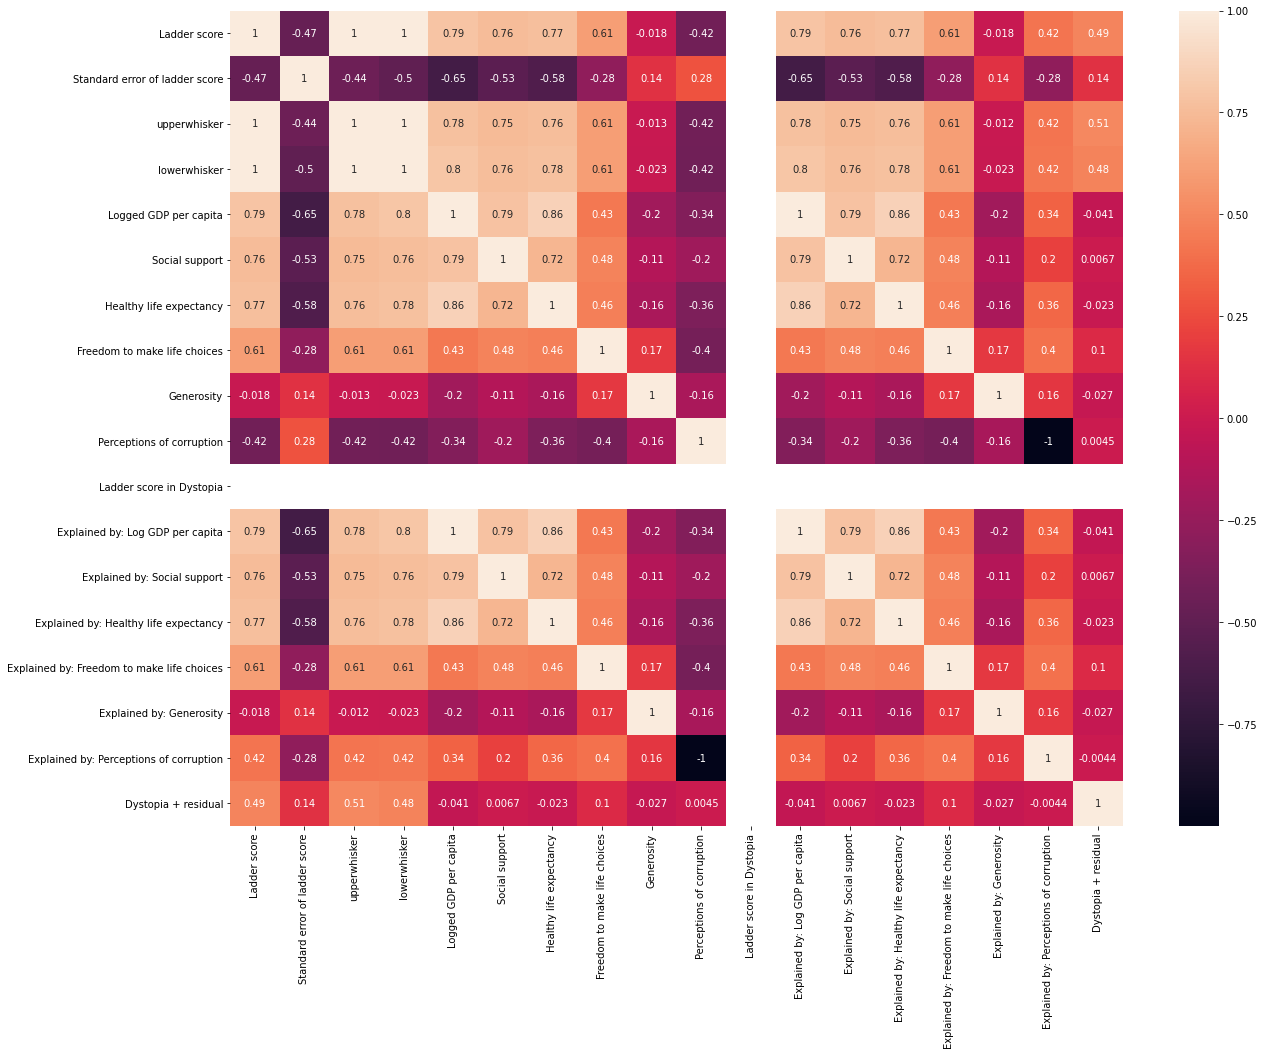

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data1.corr(),annot=True)

In [ ]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
high_corruption=data1[["Country name","Perceptions of corruption","Healthy life expectancy"]].sort_values("Perceptions of corruption",ascending=True)

In [ ]:
high_corruption

Country name  Perceptions of corruption  \
31                Singapore                      0.082   
146                  Rwanda                      0.167   
1                   Denmark                      0.179   
0                   Finland                      0.186   
6                    Sweden                      0.237   
..                      ...                        ...   
148             Afghanistan                      0.924   
63   Bosnia and Herzegovina                      0.931   
87                 Bulgaria                      0.932   
45                  Romania                      0.938   
59                  Croatia                      0.939   

     Healthy life expectancy  
31                    76.953  
146                   61.400  
1                     72.700  
0                     72.000  
6                     72.700  
..                       ...  
148                   52.493  
63                    68.098  
87                    67.000  
45                    67.355  
59                    70.799  

[149 rows x 3 columns]

In [ ]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(high_corruption[0:30],x="Country name",y="Perceptions of corruption",color="Healthy life expectancy",title="High Corruption Country")
fig.show()

In [ ]:
fig1=px.bar(high_corruption[120:],x="Country name",y="Perceptions of corruption",color="Healthy life expectancy",
           title="High Corruption Country")
fig1.show()

In [ ]:
high_corruption[high_corruption["Country name"]=="Iran"]

Country name  Perceptions of corruption  Healthy life expectancy
117         Iran                      0.714                     66.3

In [ ]:
life_exp=data1[["Country name","Freedom to make life choices","Healthy life expectancy"]].sort_values("Healthy life expectancy",ascending=True)


In [ ]:
life_exp

Country name  Freedom to make life choices  \
127                       Chad                         0.579   
144                    Lesotho                         0.715   
115                    Nigeria                         0.737   
84                 Ivory Coast                         0.741   
129                  Swaziland                         0.647   
..                         ...                           ...   
2                  Switzerland                         0.919   
26                       Spain                         0.761   
55                       Japan                         0.796   
76   Hong Kong S.A.R. of China                         0.717   
31                   Singapore                         0.927   

     Healthy life expectancy  
127                   48.478  
144                   48.700  
115                   50.102  
84                    50.114  
129                   50.833  
..                       ...  
2                     74.400  
26                    74.700  
55                    75.100  
76                    76.820  
31                    76.953  

[149 rows x 3 columns]

In [ ]:
fig=px.bar(life_exp[:20],x="Country name",y="Freedom to make life choices",color="Healthy life expectancy",
           title="Low life expectancy and freedom for life choices")
fig.show()

In [ ]:
life_exp[life_exp["Country name"]=="Iran"]

Country name  Freedom to make life choices  Healthy life expectancy
117         Iran                         0.608                     66.3

In [ ]:
fig=px.bar(life_exp[140:],x="Country name",y="Freedom to make life choices",color="Healthy life expectancy",
           title="Low life expectancy and freedom for life choices")
fig.show()

In [ ]:
GDP=data1[["Country name","Healthy life expectancy","Logged GDP per capita"]].sort_values("Logged GDP per capita",ascending=True)

In [ ]:
GDP

Country name  Healthy life expectancy  Logged GDP per capita
139               Burundi                   53.400                  6.635
143                Malawi                   57.948                  6.958
95                  Niger                   53.780                  7.098
114            Mozambique                   54.706                  7.158
119               Liberia                   56.498                  7.288
..                    ...                      ...                    ...
24   United Arab Emirates                   67.333                 11.085
2             Switzerland                   74.400                 11.117
14                Ireland                   72.400                 11.342
31              Singapore                   76.953                 11.488
7              Luxembourg                   72.600                 11.647

[149 rows x 3 columns]

In [ ]:
fig=px.bar(GDP[:20],x="Country name",y="Logged GDP per capita",color="Healthy life expectancy",
          title="Healthy life expectancy and GDP")
fig.show()


In [ ]:
fig=px.bar(GDP[140:],x="Country name",y="Logged GDP per capita",color="Healthy life expectancy",
          title="Healthy life expectancy and GDP")
fig.show()

In [ ]:
data1[["Regional indicator","Freedom to make life choices"]].groupby(["Regional indicator"],as_index=False).mean().sort_values("Freedom to make life choices",ascending=True)

Regional indicator  Freedom to make life choices
4        Middle East and North Africa                      0.716471
8                  Sub-Saharan Africa                      0.723194
2                           East Asia                      0.763500
6                          South Asia                      0.765000
0          Central and Eastern Europe                      0.797059
1  Commonwealth of Independent States                      0.816917
3         Latin America and Caribbean                      0.831750
9                      Western Europe                      0.858714
5               North America and ANZ                      0.898750
7                      Southeast Asia                      0.909000

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Regional indicator'>

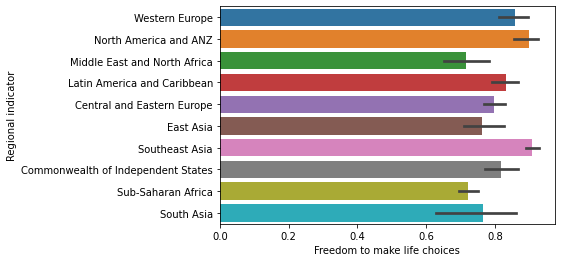

In [ ]:
sns.barplot(y="Regional indicator",x="Freedom to make life choices",data=data1)

In [ ]:
data1[["Regional indicator","Healthy life expectancy"]].groupby(["Regional indicator"],as_index=False).mean().sort_values("Healthy life expectancy",ascending=True)

Regional indicator  Healthy life expectancy
8                  Sub-Saharan Africa                55.886472
6                          South Asia                62.681000
7                      Southeast Asia                64.888444
1  Commonwealth of Independent States                65.009500
4        Middle East and North Africa                65.609118
3         Latin America and Caribbean                67.076050
0          Central and Eastern Europe                68.338412
2                           East Asia                71.252167
5               North America and ANZ                72.325000
9                      Western Europe                73.033095

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Regional indicator'>

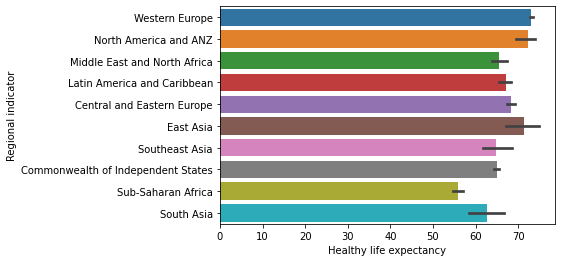

In [ ]:
sns.barplot(x="Healthy life expectancy",y="Regional indicator",data=data1)

In [ ]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
data1[["Logged GDP per capita","Regional indicator"]].groupby(["Regional indicator"],as_index=False).mean().sort_values("Logged GDP per capita",ascending=True)

Regional indicator  Logged GDP per capita
8                  Sub-Saharan Africa               8.075194
6                          South Asia               8.682571
3         Latin America and Caribbean               9.370000
1  Commonwealth of Independent States               9.401833
7                      Southeast Asia               9.421444
4        Middle East and North Africa               9.666118
0          Central and Eastern Europe              10.109059
2                           East Asia              10.367667
5               North America and ANZ              10.809500
9                      Western Europe              10.822714

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Regional indicator'>

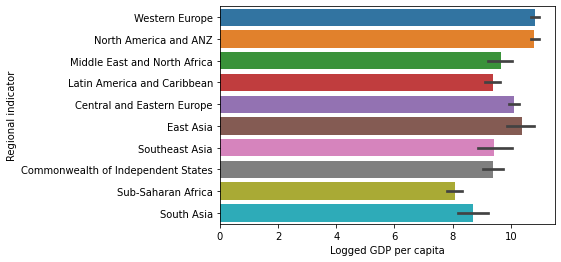

In [ ]:
sns.barplot(x="Logged GDP per capita",y="Regional indicator", data=data1)

In [ ]:
fig=px.scatter(data1,x="Regional indicator",y="Freedom to make life choices",color="Healthy life expectancy",
              size="Logged GDP per capita",hover_data=["Social support","Country name"])
fig.show()

In [ ]:
fig=px.pie(data1,values="Logged GDP per capita",names="Regional indicator",title="% of Logged GDP of regions from data")
fig.show()


In [ ]:
fig=px.pie(data1,values="Freedom to make life choices",names="Regional indicator")
fig.show()

In [ ]:
fig=px.pie(data1,values="Healthy life expectancy",names="Regional indicator",title="% of Healthy life expectancy from data")
fig.show()

In [ ]:
fig=px.density_heatmap(data1,x="Freedom to make life choices",y="Perceptions of corruption",marginal_x="box",marginal_y="violin")
fig.show()

In [ ]:
fig=px.scatter(data1, x="Healthy life expectancy", y="Logged GDP per capita", color="Regional indicator",marginal_x="box",
              marginal_y="violin",hover_data=["Country name"])
fig.show()

In [ ]:
fig=px.scatter(data1,x="Healthy life expectancy",y="Freedom to make life choices",color="Regional indicator"
               ,marginal_x="box",marginal_y="violin", hover_data=["Country name"])
fig.show()

In [ ]:
fig=px.violin(data1,y="Logged GDP per capita",x="Generosity",color="Regional indicator",box=True,points="all",
             hover_data=data1.columns)
fig.show()

In [ ]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
data1[["Regional indicator","Healthy life expectancy"]].groupby(["Regional indicator"],as_index=False).mean().sort_values(by="Healthy life expectancy",ascending=False)

Regional indicator  Healthy life expectancy
9                      Western Europe                73.033095
5               North America and ANZ                72.325000
2                           East Asia                71.252167
0          Central and Eastern Europe                68.338412
3         Latin America and Caribbean                67.076050
4        Middle East and North Africa                65.609118
1  Commonwealth of Independent States                65.009500
7                      Southeast Asia                64.888444
6                          South Asia                62.681000
8                  Sub-Saharan Africa                55.886472

In [ ]:
data1[["Regional indicator","Logged GDP per capita"]].groupby(["Regional indicator"],as_index=False).mean().sort_values(by="Logged GDP per capita",ascending=False)

Regional indicator  Logged GDP per capita
9                      Western Europe              10.822714
5               North America and ANZ              10.809500
2                           East Asia              10.367667
0          Central and Eastern Europe              10.109059
4        Middle East and North Africa               9.666118
7                      Southeast Asia               9.421444
1  Commonwealth of Independent States               9.401833
3         Latin America and Caribbean               9.370000
6                          South Asia               8.682571
8                  Sub-Saharan Africa               8.075194

In [ ]:
data1[["Regional indicator","Freedom to make life choices"]].groupby(["Regional indicator"],as_index=False).mean().sort_values(by="Freedom to make life choices",ascending=False)

Regional indicator  Freedom to make life choices
7                      Southeast Asia                      0.909000
5               North America and ANZ                      0.898750
9                      Western Europe                      0.858714
3         Latin America and Caribbean                      0.831750
1  Commonwealth of Independent States                      0.816917
0          Central and Eastern Europe                      0.797059
6                          South Asia                      0.765000
2                           East Asia                      0.763500
8                  Sub-Saharan Africa                      0.723194
4        Middle East and North Africa                      0.716471

In [ ]:
data1[["Regional indicator","Perceptions of corruption"]].groupby(["Regional indicator"], as_index=False).mean().sort_values(by="Perceptions of corruption",ascending=False)

Regional indicator  Perceptions of corruption
0          Central and Eastern Europe                   0.850529
6                          South Asia                   0.797429
3         Latin America and Caribbean                   0.792600
8                  Sub-Saharan Africa                   0.765944
4        Middle East and North Africa                   0.762235
1  Commonwealth of Independent States                   0.725083
7                      Southeast Asia                   0.709111
2                           East Asia                   0.683333
9                      Western Europe                   0.523095
5               North America and ANZ                   0.449250

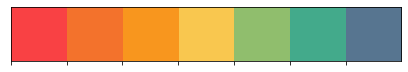

In [ ]:
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

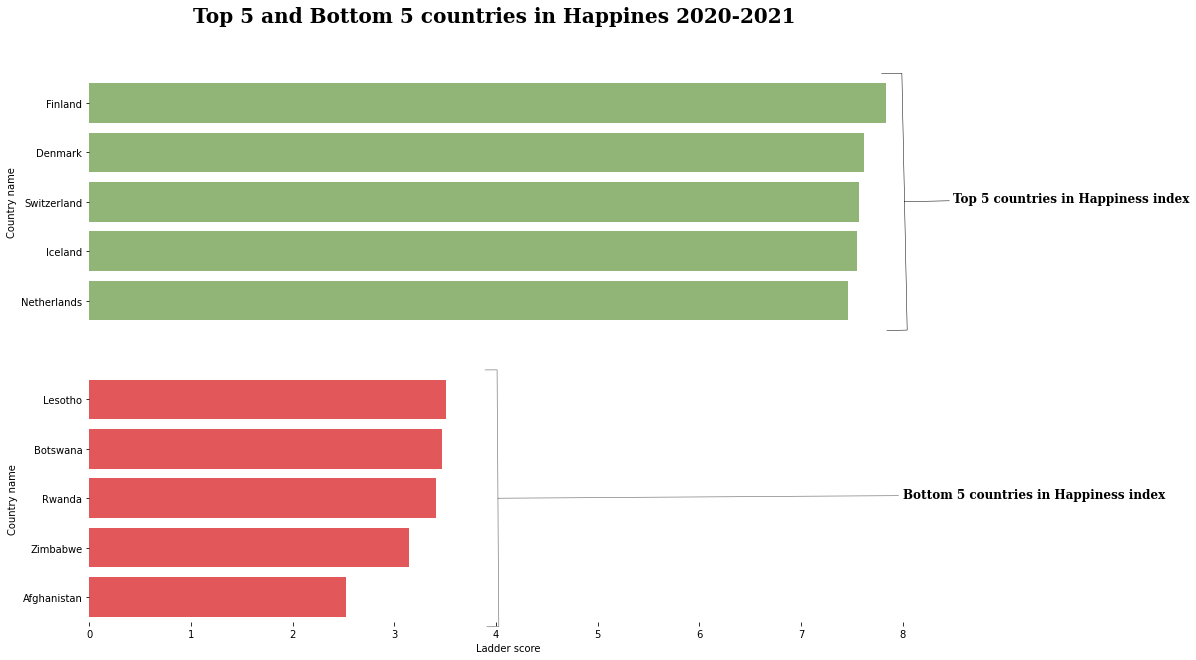

In [ ]:
import matplotlib.gridspec as gs
fig=plt.figure(figsize=(15,10))
g=gs.GridSpec(ncols=1,nrows=2,figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happines 2020-2021",family="Serif",weight="bold",size=20)
ax1=plt.subplot(g[0,0])

top_5=data1.head(5)
bot_5=data1.tail(5)


ax1=sns.barplot(data=top_5,x=top_5["Ladder score"],y=top_5["Country name"],color=color[4])
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xytext=(8.5,2),xy=(8,2),family="Serif",weight="bold",size=12,arrowprops=dict(arrowstyle="-[,widthB=10.7,lengthB=1.7",lw=0.5))
ax2=plt.subplot(g[1,0],sharex=ax1)
ax2=sns.barplot(data=bot_5,x=bot_5["Ladder score"],y=bot_5["Country name"] ,color=color[0])
ax2.annotate("Bottom 5 countries in Happiness index",xytext=(8,2),xy=(4,2),family="Serif",weight="bold", size=12,arrowprops=dict(arrowstyle='-[, widthB=10.7, lengthB=1',lw=0.7,color="gray"))

for s in ["left","right","top","bottom"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)


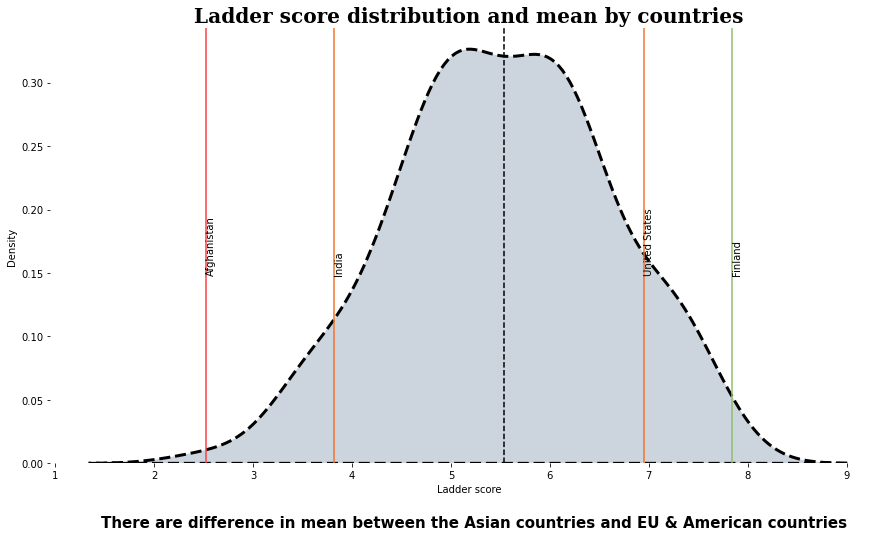

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution and mean by countries",family='Serif', weight='bold', size=20)
sns.kdeplot(data1['Ladder score'], fill=True,color=color[-1], shade=True, edgecolor='black', linewidth=3, ls='--', alpha=0.3)
plt.axvline(data1['Ladder score'].mean(), c='black',ls='--')
plt.axvline(data1[data1['Country name']=='Finland']['Ladder score'].mean(), c=color[4])
plt.text(x=data1[data1['Country name']=='Finland']['Ladder score'].mean(), y=0.15, s='Finland', rotation=90)
plt.axvline(data1[data1['Country name']=='Afghanistan']['Ladder score'].mean(), c=color[0])
plt.text(x=data1[data1['Country name']=='Afghanistan']['Ladder score'].mean(), y=0.15, s='Afghanistan', rotation=90)
plt.axvline(data1[data1['Country name']=='India']['Ladder score'].mean(), c=color[1])
plt.text(x=data1[data1['Country name']=='India']['Ladder score'].mean(), y=0.15, s='India', rotation=90)
plt.axvline(data1[data1['Country name']=='United States']['Ladder score'].mean(), c=color[1])
plt.text(x=data1[data1['Country name']=='United States']['Ladder score'].mean(), y=0.15, s='United States', rotation=90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.text(x=9,y=-0.05, s="There are difference in mean between the Asian countries and EU & American countries", ha='right', family='San', size=15, weight='bold')
plt.show()

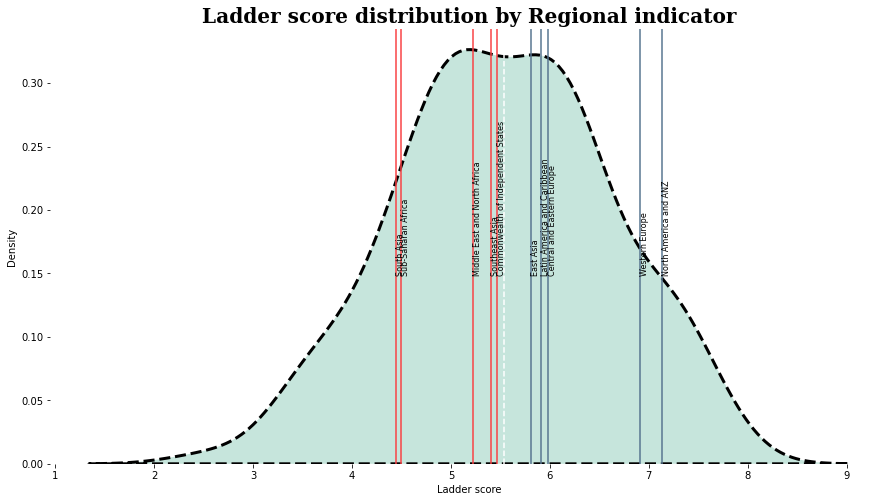

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution by Regional indicator",weight="bold",family="Serif",size=20)
sns.kdeplot(data1["Ladder score"],shade=True,color=color[-2],fill=True,edgecolor="black",ls="--",alpha=0.3,linewidth=3)
plt.axvline(data1["Ladder score"].mean(),color="white",ls="--")

pop=data1["Ladder score"].mean()
m=0
c=0

for region in data1["Regional indicator"].unique():
    m=data1[data1["Regional indicator"]==region]["Ladder score"].mean()
    if m<pop:
        c=color[0]
    else:
        c=color[-1]
    plt.axvline(x=m,color=c)
    plt.text(x=m, s=region,rotation=90,y=0.15,fontsize=8)
for s in ["left","right","bottom","top"]:
    plt.gca().spines[s].set_visible(False)

Text(5.5, -0.02, 'Population mean')

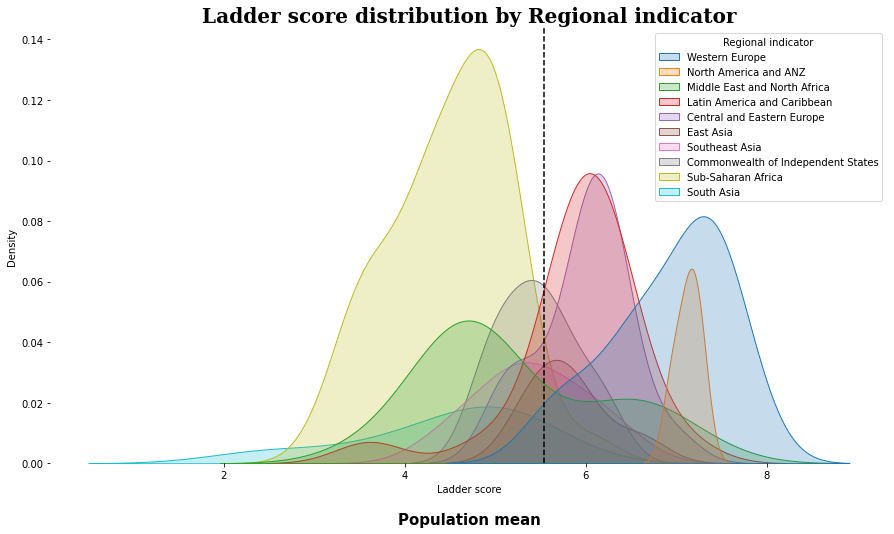

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Ladder score distribution by Regional indicator",weight="bold",family="Serif",size=20)
sns.kdeplot(data1["Ladder score"],hue=data1["Regional indicator"],shade=True,fill=True)
plt.axvline(data1["Ladder score"].mean(),color="black",ls="--")


for s in["left","right","bottom","top"]:
    plt.gca().spines[s].set_visible(False)
plt.text(s="Population mean",family="San",size=15,weight="bold",ha="right",y=-0.02,x=5.5)

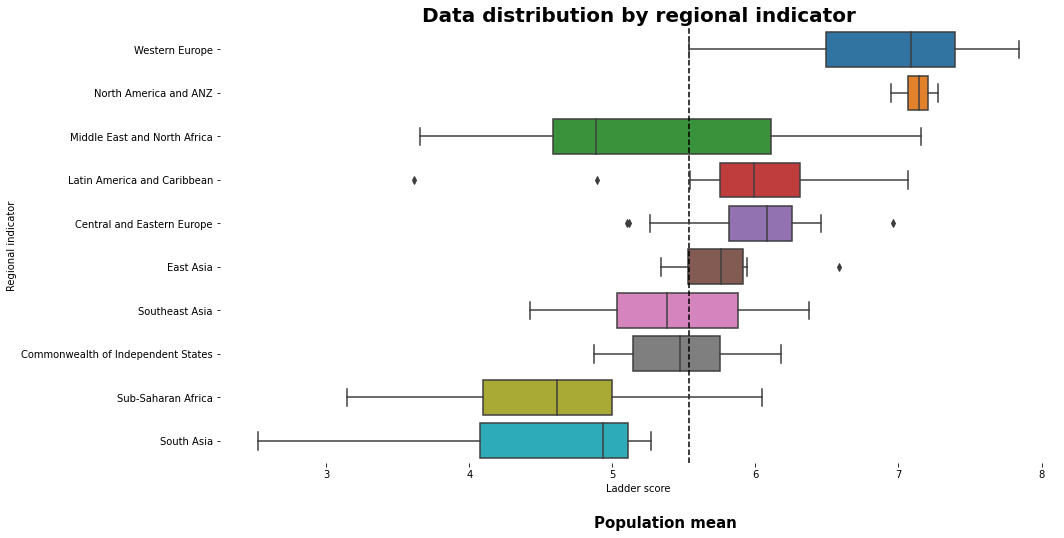

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Data distribution by regional indicator",weight="bold",size=20)
plt.axvline(data1["Ladder score"].mean(),ls="--",color="black")
sns.boxplot(x=data1["Ladder score"],y=data1["Regional indicator"])
for s in ["left","right","bottom","top"]:
    plt.gca().spines[s].set_visible(False)
plt.text(s="Population mean",y=11,x=4.875,family="San",size=15,weight="bold")

plt.show()

In [ ]:
from scipy.stats import ttest_ind ,wilcoxon,ttest_rel
def hypo_test(reg1,reg2):
    r1=data1[data1["Regional indicator"]==reg1]["Ladder score"]
    r2=data1[data1["Regional indicator"]==reg2]["Ladder score"]
    t1="Hypotheis test between regions: {} vs {}".format(reg1,reg2)
    
    stats,p_value=ttest_ind(r1,r2)
    
    if p_value<0.05:
        t2="since p_value : {} is < 0.05, we can reject the Null Hypothesis and say there are significant difference".format(np.round(p_value,3))

    else:
        t2="P_value: {} is >0.05, we can't reject the Null Hypothesis, so we say there is no difference".format(np.round(p_value,3))
    fig=plt.figure(figsize=(20,4))
    plt.title(t1,family="Serif",weight="bold",size=20)
    plt.text(x=plt.xlim()[1]/2,y=plt.ylim()[1]/2,s=t2,ha="center",family="Serif",weight="bold",size=15)
    for pos in ["right","top","bottom","left"]:
        plt.gca().spines[pos].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    return

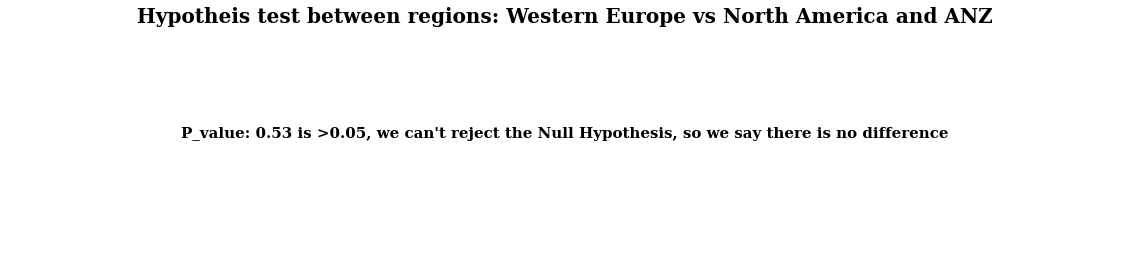

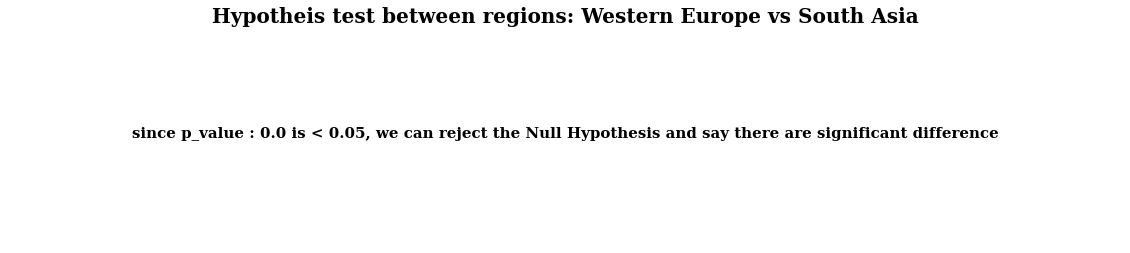

In [ ]:
reg=data1["Regional indicator"].unique()
hypo_test(reg[0],reg[1])
hypo_test(reg[0],reg[-1])

In [ ]:
data2=pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")

In [ ]:
data2.head(15)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008        3.724               7.370           0.451   
1   Afghanistan  2009        4.402               7.540           0.552   
2   Afghanistan  2010        4.758               7.647           0.539   
3   Afghanistan  2011        3.832               7.620           0.521   
4   Afghanistan  2012        3.783               7.705           0.521   
5   Afghanistan  2013        3.572               7.725           0.484   
6   Afghanistan  2014        3.131               7.718           0.526   
7   Afghanistan  2015        3.983               7.702           0.529   
8   Afghanistan  2016        4.220               7.697           0.559   
9   Afghanistan  2017        2.662               7.697           0.491   
10  Afghanistan  2018        2.694               7.692           0.508   
11  Afghanistan  2019        2.375               7.697           0.420   
12      Albania  2007        4.634               9.142           0.821   
13      Albania  2009        5.485               9.262           0.833   
14      Albania  2010        5.269               9.303           0.733   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                              50.80                         0.718   
1                              51.20                         0.679   
2                              51.60                         0.600   
3                              51.92                         0.496   
4                              52.24                         0.531   
5                              52.56                         0.578   
6                              52.88                         0.509   
7                              53.20                         0.389   
8                              53.00                         0.523   
9                              52.80                         0.427   
10                             52.60                         0.374   
11                             52.40                         0.394   
12                             65.80                         0.529   
13                             66.20                         0.525   
14                             66.40                         0.569   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
0        0.168                      0.882            0.518            0.258  
1        0.190                      0.850            0.584            0.237  
2        0.121                      0.707            0.618            0.275  
3        0.162                      0.731            0.611            0.267  
4        0.236                      0.776            0.710            0.268  
5        0.061                      0.823            0.621            0.273  
6        0.104                      0.871            0.532            0.375  
7        0.080                      0.881            0.554            0.339  
8        0.042                      0.793            0.565            0.348  
9       -0.121                      0.954            0.496            0.371  
10      -0.094                      0.928            0.424            0.405  
11      -0.108                      0.924            0.351            0.502  
12      -0.009                      0.875            0.553            0.246  
13      -0.158                      0.864            0.640            0.279  
14      -0.172                      0.726            0.648            0.300

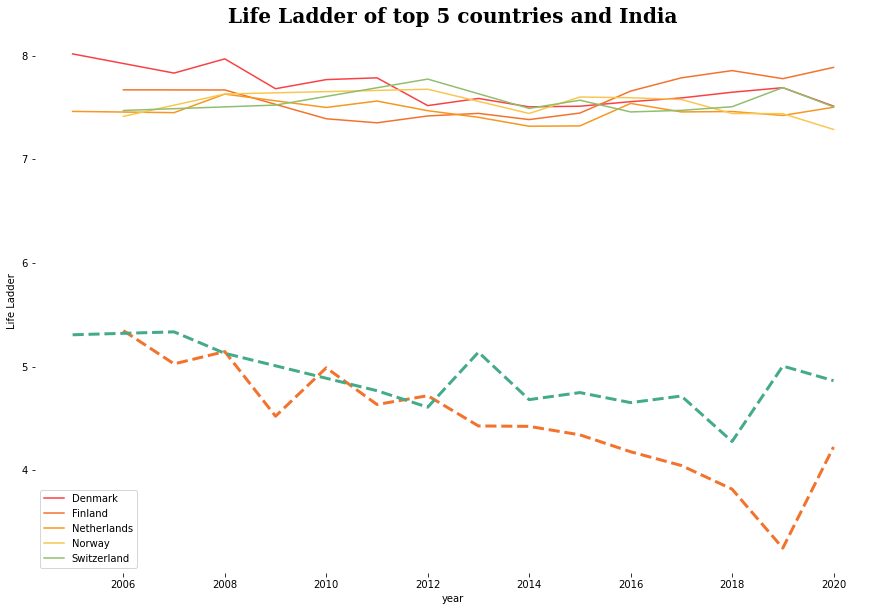

In [ ]:
top_5 = data2.groupby('Country name')['Life Ladder'].mean().nlargest(5)
#bot_5 = df1.groupby('Country name')['Life Ladder'].mean().nsmallest(5)
fig=plt.figure(figsize=(15,10))
plt.title("Life Ladder of top 5 countries and India",family='Serif', weight='bold', size=20)
sns.lineplot(data=data2[data2['Country name'].isin(top_5.index)], x='year',y='Life Ladder',hue='Country name', palette=color[0:5])
sns.lineplot(data=data2[data2['Country name']=='India'], x='year',y='Life Ladder', color=color[1], linewidth=3, ls='--')
sns.lineplot(data=data2[data2["Country name"]=="Iran"],x="year",y="Life Ladder",ls="--",linewidth=3,color=color[5])

for s in ["left","right","bottom","top"]:
    plt.gca().spines[s].set_visible(False)

plt.show()

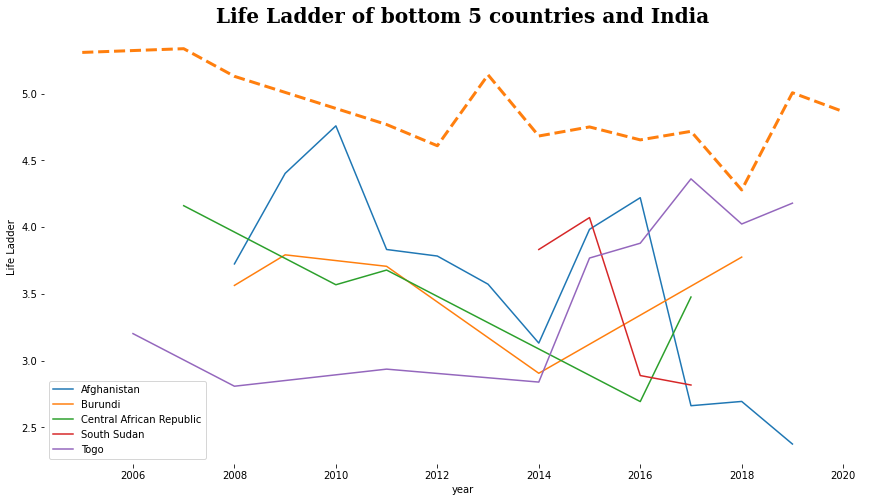

In [ ]:
fig=plt.figure(figsize=(15,8))
bott_5=data2.groupby("Country name")["Life Ladder"].mean().nsmallest(5)
plt.title("Life Ladder of bottom 5 countries and India",family='Serif', weight='bold', size=20)
sns.lineplot(data=data2[data2["Country name"].isin(bott_5.index)],x='year',y="Life Ladder",hue="Country name")
sns.lineplot(data=data2[data2["Country name"]=="Iran"],x="year",y="Life Ladder",ls="--",linewidth=3)

for s in ["left","right","bottom","top"]:
    plt.gca().spines[s].set_visible(False)
plt.show()

In [ ]:
df1=data1[['Country name', 'Regional indicator', 'Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
cols=df1.corr()["Ladder score"].sort_values(ascending=False)

In [ ]:
cols

Ladder score                    1.000000
Logged GDP per capita           0.789760
Healthy life expectancy         0.768099
Social support                  0.756888
Freedom to make life choices    0.607753
Generosity                     -0.017799
Perceptions of corruption      -0.421140
Name: Ladder score, dtype: float64

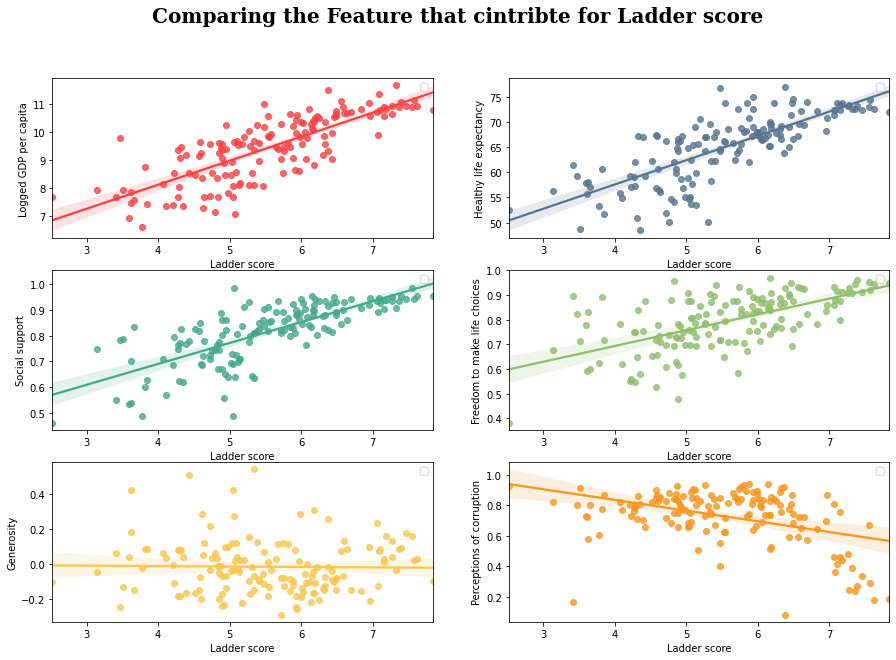

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Feature that cintribte for Ladder score",family="Serif",size=20,weight="bold")
j=0
for i in cols.index[1:]:
        ax=plt.subplot(321+j)
        ax=sns.regplot(data=df1,x="Ladder score",y=i,color=color[-j])
        ax.legend('')
        j=j+1
plt.legend('')


plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def comp_country(Country1,Country2):
    data3=data2[data2["Country name"].isin([Country1,Country2])]
    data3.rename(columns={'Healthy life expectancy at birth':'Healthy life expectancy','Log GDP per capita':'Logged GDP per capita','Life Ladder':'Ladder score'}, inplace=True)
    plt.figure(figsize=(15,20))
    plt.suptitle("Comparing the Features that contribute for Happiness index for {} vs {}".format(Country1,Country2),family="Serif",size=20,weight="bold")
    j=0
    for i in cols.index:
        
        ax=plt.subplot(421+j)
        
        ax=sns.lineplot(data=data3,x="year",y=i,hue="Country name",color=color[-2])
        j=j+1
        
    return
        
        

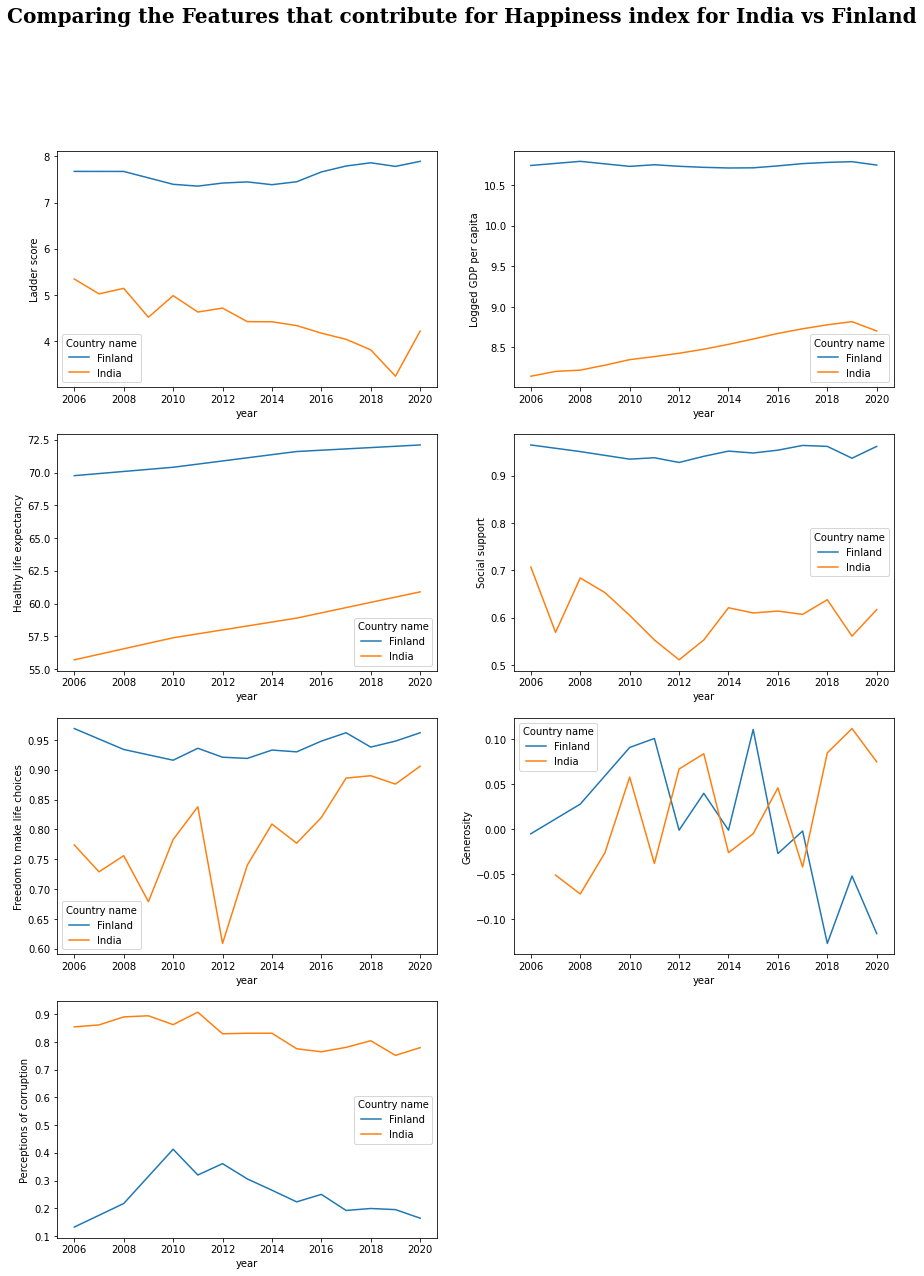

In [ ]:
comp_country("India","Finland")

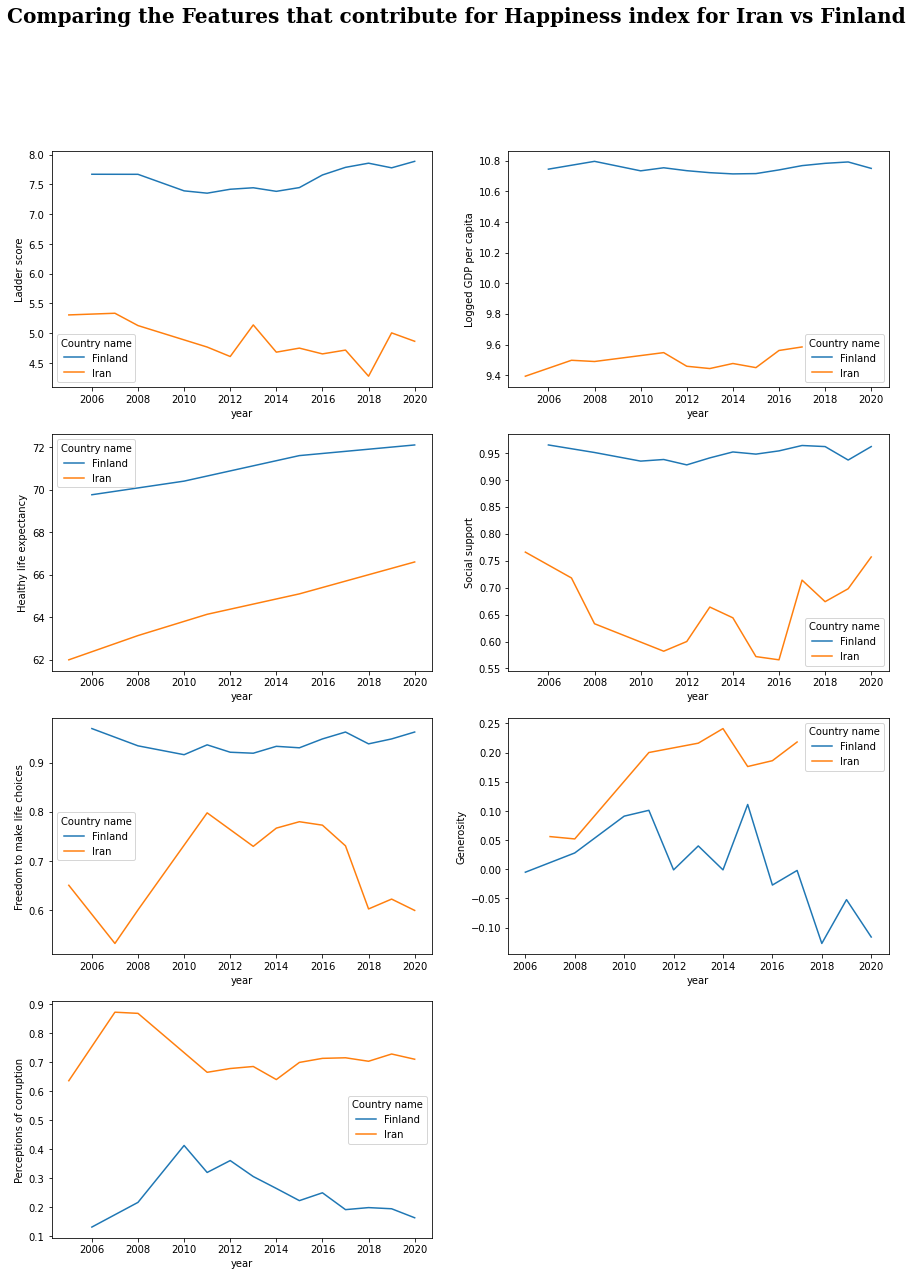

In [ ]:
comp_country("Iran","Finland")

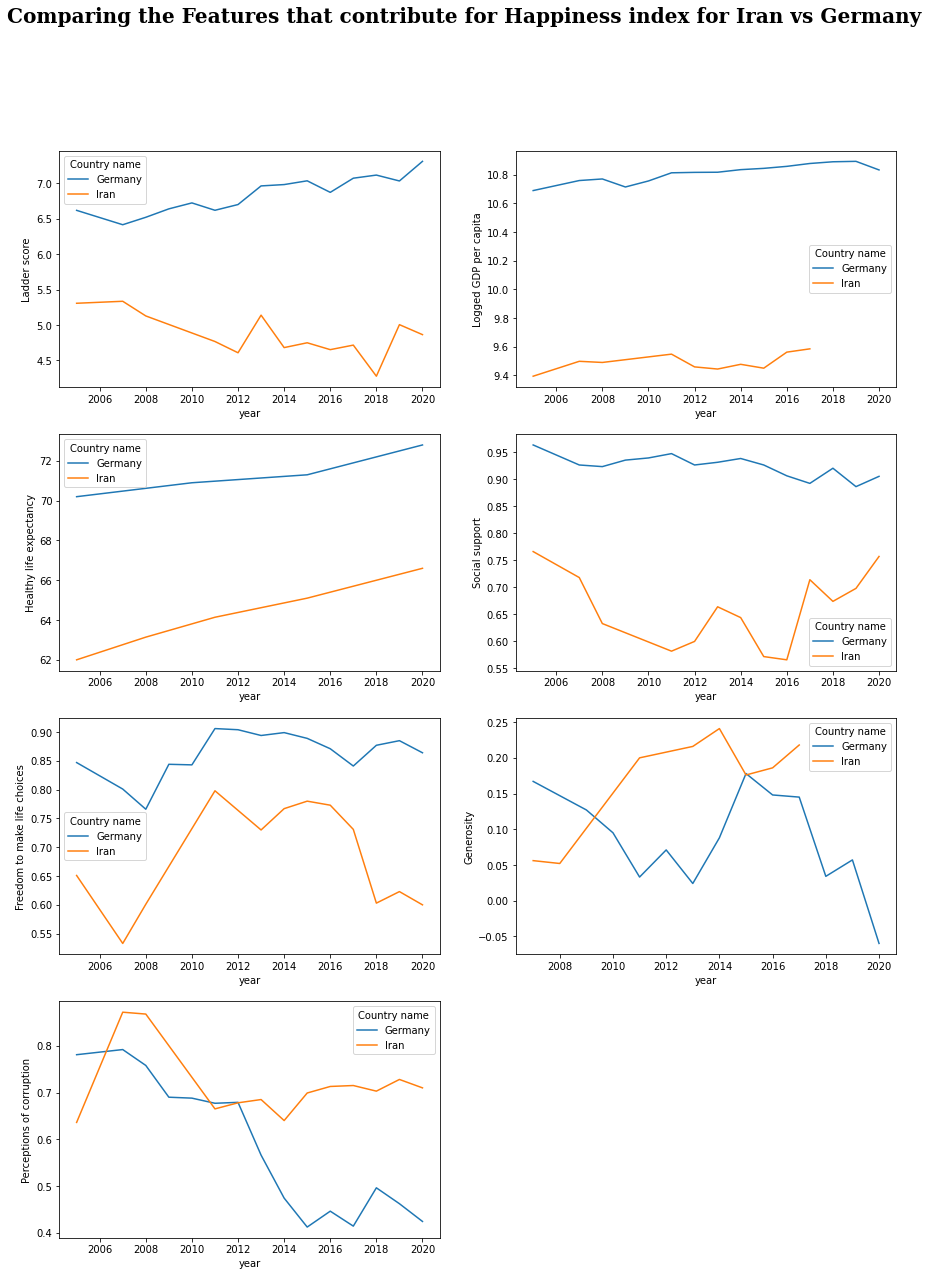

In [ ]:
comp_country("Iran","Germany")

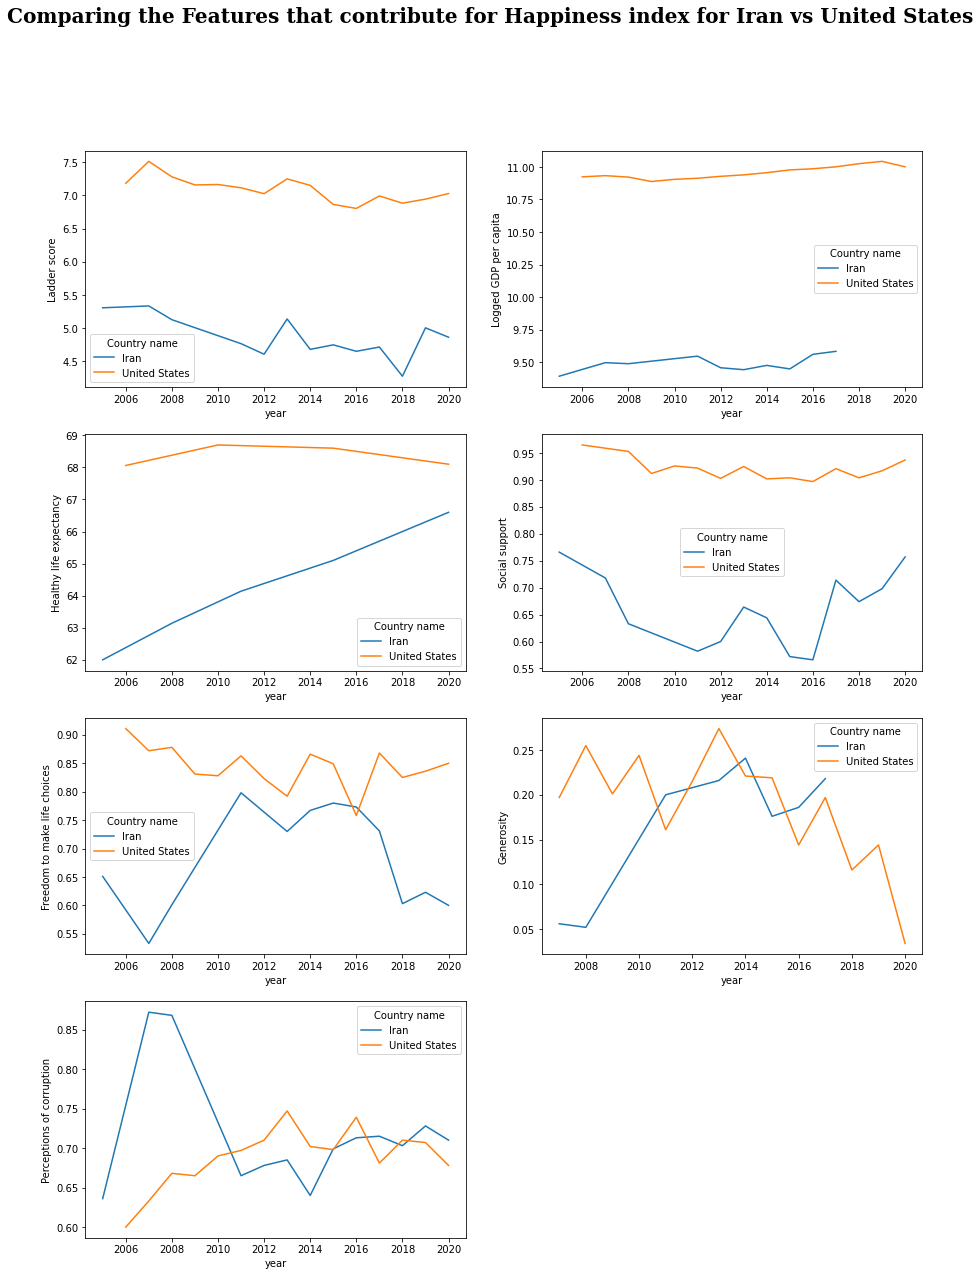

In [ ]:
comp_country("Iran","United States")

In [ ]:
pd.DataFrame(columns=["mean"],data=data1.mean())

mean
Ladder score                                 5.532839
Standard error of ladder score               0.058752
upperwhisker                                 5.648007
lowerwhisker                                 5.417631
Logged GDP per capita                        9.432208
Social support                               0.814745
Healthy life expectancy                     64.992799
Freedom to make life choices                 0.791597
Generosity                                  -0.015134
Perceptions of corruption                    0.727450
Ladder score in Dystopia                     2.430000
Explained by: Log GDP per capita             0.977161
Explained by: Social support                 0.793315
Explained by: Healthy life expectancy        0.520161
Explained by: Freedom to make life choices   0.498711
Explained by: Generosity                     0.178047
Explained by: Perceptions of corruption      0.135141
Dystopia + residual                          2.430329

In [ ]:
def country_barcomp1(country1,country2):
    data4=data1[data1["Country name"].isin([country1,country2])]
  
    data4.rename(columns={'Healthy life expectancy at birth':'Healthy life expectancy','Log GDP per capita':'Logged GDP per capita','Life Ladder':'Ladder score'}, inplace=True)
    data4=data4[cols.index].T
    data4.columns=[country1,country2]
    fig, axes=plt.subplots(1,2,figsize=(12,16),sharey=True)
    p1=sns.barplot(data=data4,x=country1,y=data4.index,ax=axes[0])
    p2=sns.barplot(data=data4,x=country2,y=data4.index,ax=axes[1])
    p1.yaxis.tick_right()
    for s in ["left","right","bottom","top"]:
        p2.spines[s].set_visible(False)
        p1.spines[s].set_visible(False)
    return
    

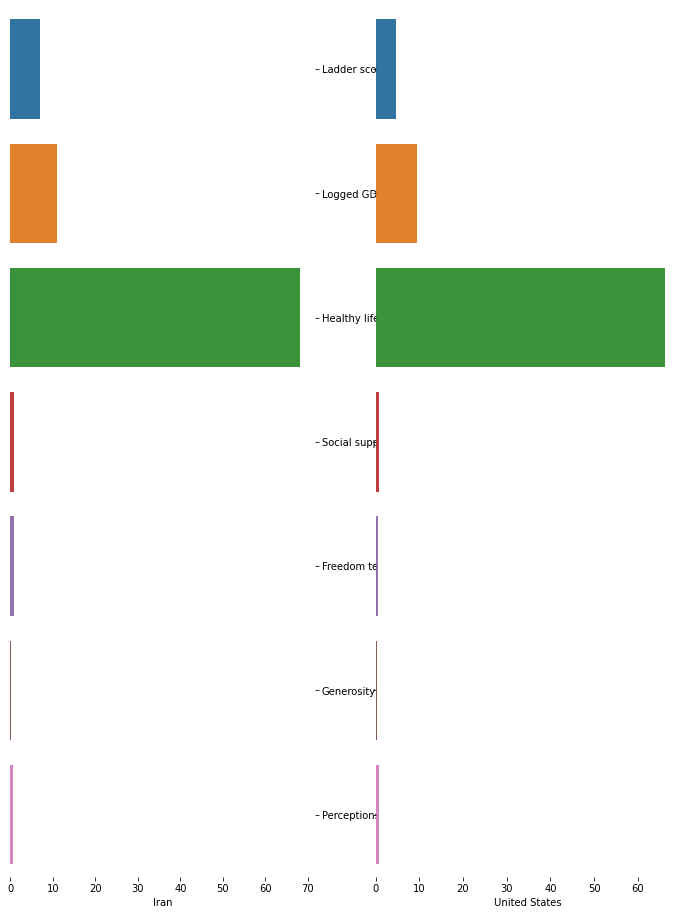

In [ ]:
country_barcomp1("Iran","United States")

In [ ]:
def country_barcomp(country1,country2):
    data4=data1[data1["Country name"].isin([country1,country2])]
  
    data4.rename(columns={'Healthy life expectancy at birth':'Healthy life expectancy','Log GDP per capita':'Logged GDP per capita','Life Ladder':'Ladder score'}, inplace=True)
    data4=data4[cols.index].T
    data4.columns=[country1,country2]
    plt.figure(figsize=(15,20))
    plt.suptitle("comparison {} and {}".format(country1,country2),family="Serif",weight="bold",size=20)
    g=gs.GridSpec(nrows=1,ncols=2,wspace=0)
    ax1=plt.subplot(g[0,0])
    for s in ["left","right","bottom","top"]:
        ax1.spines[s].set_visible(False)
    ax1=sns.barplot(data=data4,y=data4.index,x=country1,color=color[-1]).invert_xaxis()
    ax2=plt.subplot(g[0,1], sharey=ax1)
    ax2=sns.barplot(data=data4,y=data4.index,x=country2,color=color[0])
    ax2.yaxis.tick_right()
    for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
    return

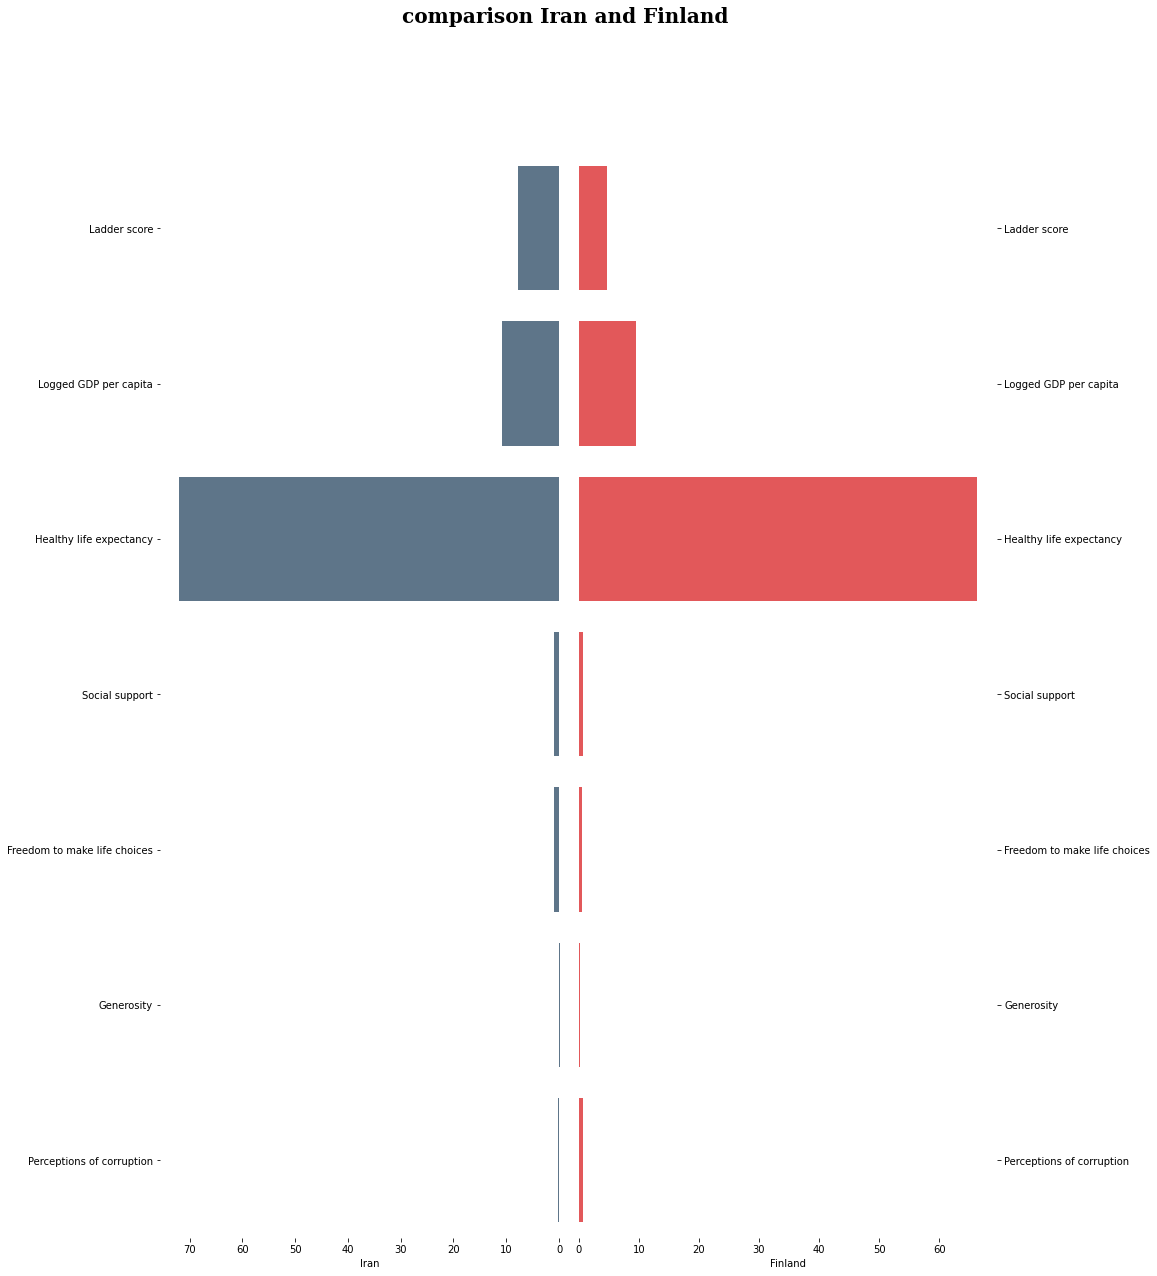

In [ ]:
country_barcomp("Iran","Finland")

**Warning!**
you must fix the problem of the bottom code

In [ ]:
def region_barcomp(region1,region2):
    data4=data1[data1["Regional indicator"].isin([region1,region2])].mean()
    print(data4)
#     data4.rename(columns={'Healthy life expectancy at birth':'Healthy life expectancy','Log GDP per capita':'Logged GDP per capita','Life Ladder':'Ladder score'}, inplace=True)
    data4=data4[cols.index].T
    data4.columns=[region1,region2]
    plt.figure(figsize=(15,20))
    plt.suptitle("comparison {} and {}".format(region1,region2),family="Serif",weight="bold",size=20)
    g=gs.GridSpec(nrows=1,ncols=2,wspace=0)
    ax1=plt.subplot(g[0,0])
    for s in ["left","right","bottom","top"]:
        ax1.spines[s].set_visible(False)
    ax1=sns.barplot(data=data4,y=data4.index,x=region1,color=color[-1]).invert_xaxis()
    ax2=plt.subplot(g[0,1], sharey=ax1)
    ax2=sns.barplot(data=data4,y=data4.index,x=region2,color=color[0])
    ax2.yaxis.tick_right()
    for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
    return

In [ ]:
data1["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [ ]:
# region_barcomp("Western Europe","Middle East and North Africa")

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

In [ ]:
data2

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

In [ ]:
data1.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [ ]:
data6=data2.merge(data1['Regional indicator'],left_on=data2['Country name'], right_on=data1['Country name']).drop('key_0', axis=1)

In [ ]:
data6

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1881     Zimbabwe  2016        3.735               7.984           0.768   
1882     Zimbabwe  2017        3.638               8.016           0.754   
1883     Zimbabwe  2018        3.616               8.049           0.775   
1884     Zimbabwe  2019        2.694               7.950           0.759   
1885     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1881                             54.40                         0.733   
1882                             55.00                         0.753   
1883                             55.60                         0.763   
1884                             56.20                         0.632   
1885                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1881      -0.095                      0.724            0.738            0.209   
1882      -0.098                      0.751            0.806            0.224   
1883      -0.068                      0.844            0.710            0.212   
1884      -0.064                      0.831            0.716            0.235   
1885      -0.009                      0.789            0.703            0.346   

      Regional indicator  
0             South Asia  
1             South Asia  
2             South Asia  
3             South Asia  
4             South Asia  
...                  ...  
1881  Sub-Saharan Africa  
1882  Sub-Saharan Africa  
1883  Sub-Saharan Africa  
1884  Sub-Saharan Africa  
1885  Sub-Saharan Africa  

[1886 rows x 12 columns]

In [ ]:
data6[data6['Regional indicator']=='South Asia'].pivot_table(index="Country name", columns="year")['Life Ladder']

year           2005   2006   2007   2008   2009   2010   2011   2012   2013  \
Country name                                                                  
Afghanistan     NaN    NaN    NaN  3.724  4.402  4.758  3.832  3.783  3.572   
Bangladesh      NaN  4.319  4.607  5.052  5.083  4.858  4.986  4.724  4.660   
India           NaN  5.348  5.027  5.146  4.522  4.989  4.635  4.720  4.428   
Maldives        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Nepal           NaN  4.567  4.748  4.441  4.917  4.350  3.809  4.233  4.605   
Pakistan      5.225    NaN  5.671  4.414  5.208  5.786  5.267  5.132  5.138   
Sri Lanka       NaN  4.345  4.415  4.431  4.212  3.977  4.181  4.225  4.365   

year           2014   2015   2016   2017   2018   2019   2020  
Country name                                                   
Afghanistan   3.131  3.983  4.220  2.662  2.694  2.375    NaN  
Bangladesh    4.636  4.633  4.556  4.310  4.499  5.114  5.280  
India         4.424  4.342  4.179  4.046  3.818  3.249  4.225  
Maldives        NaN    NaN    NaN    NaN  5.198    NaN    NaN  
Nepal         4.975  4.812  5.100  4.737  4.910  5.449    NaN  
Pakistan      5.436  4.823  5.549  5.831  5.472  4.443    NaN  
Sri Lanka     4.268  4.612    NaN  4.331  4.435  4.213    NaN

In [ ]:
data6[data6["Life Ladder"]<=4].pivot_table(index="Country name",columns="year")["Generosity"]

year                  2006   2007   2008   2009   2010   2011   2012   2013  \
Country name                                                                  
Afghanistan            NaN    NaN  0.168    NaN    NaN  0.162  0.236  0.061   
Benin               -0.011    NaN -0.004    NaN    NaN -0.142 -0.111 -0.085   
Botswana               NaN    NaN    NaN    NaN -0.143 -0.250    NaN    NaN   
Bulgaria               NaN -0.138    NaN    NaN -0.144 -0.228    NaN -0.191   
Burkina Faso         0.028    NaN -0.101    NaN    NaN    NaN -0.070 -0.016   
Burundi                NaN    NaN -0.019 -0.019    NaN -0.062    NaN    NaN   
Cambodia             0.255    NaN    NaN    NaN    NaN    NaN  0.247  0.164   
Cameroon            -0.009    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Chad                 0.028    NaN    NaN  0.021  0.025    NaN    NaN -0.045   
Comoros                NaN    NaN    NaN -0.074  0.005 -0.075 -0.121    NaN   
Congo (Brazzaville)    NaN    NaN -0.098    NaN    NaN    NaN -0.112 -0.078   
Egypt                  NaN    NaN    NaN    NaN    NaN    NaN    NaN -0.141   
Gabon                  NaN    NaN    NaN    NaN    NaN    NaN -0.195 -0.146   
Georgia             -0.267 -0.267    NaN -0.233    NaN    NaN    NaN    NaN   
Ghana                  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Guinea                 NaN    NaN    NaN    NaN    NaN    NaN  0.001  0.091   
Haiti                0.401    NaN  0.261    NaN  0.216    NaN    NaN    NaN   
India                  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Ivory Coast            NaN    NaN    NaN    NaN    NaN    NaN    NaN -0.031   
Kenya                  NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.212   
Lesotho                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Liberia                NaN  0.115    NaN    NaN    NaN    NaN    NaN    NaN   
Madagascar          -0.039    NaN    NaN    NaN    NaN    NaN -0.055 -0.019   
Malawi               0.200    NaN    NaN    NaN    NaN  0.099    NaN    NaN   
Mali                   NaN    NaN    NaN  0.008 -0.028    NaN    NaN -0.053   
Mauritania             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Nepal                  NaN    NaN    NaN    NaN    NaN -0.010    NaN    NaN   
Niger                0.076    NaN    NaN    NaN    NaN    NaN -0.064 -0.077   
Rwanda                 NaN    NaN    NaN    NaN    NaN    NaN -0.012 -0.028   
Senegal                NaN    NaN    NaN    NaN    NaN -0.160 -0.036 -0.052   
Sierra Leone         0.101  0.248  0.148    NaN    NaN    NaN    NaN    NaN   
South Africa           NaN    NaN    NaN    NaN    NaN    NaN    NaN -0.077   
Sri Lanka              NaN    NaN    NaN    NaN  0.259    NaN    NaN    NaN   
Tanzania            -0.027    NaN    NaN  0.308  0.139    NaN    NaN  0.054   
Togo                -0.007    NaN -0.055    NaN    NaN -0.070    NaN    NaN   
Uganda              -0.041    NaN    NaN    NaN    NaN    NaN    NaN  0.053   
Ukraine                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Yemen                  NaN    NaN    NaN    NaN    NaN -0.173    NaN    NaN   
Zambia                 NaN -0.067    NaN    NaN    NaN    NaN    NaN    NaN   
Zimbabwe            -0.076 -0.082 -0.090    NaN    NaN    NaN    NaN    NaN   

year                  2014   2015   2016   2017   2018   2019   2020  
Country name                                                          
Afghanistan          0.104  0.080    NaN -0.121 -0.094 -0.108    NaN  
Benin               -0.096 -0.027    NaN    NaN    NaN    NaN    NaN  
Botswana               NaN -0.116 -0.253 -0.248 -0.254 -0.239    NaN  
Bulgaria               NaN    NaN    NaN    NaN    NaN    NaN    NaN  
Burkina Faso        -0.004    NaN    NaN    NaN    NaN    NaN    NaN  
Burundi             -0.059    NaN    NaN    NaN -0.024    NaN    NaN  
Cambodia             0.239    NaN    NaN    NaN    NaN    NaN    NaN  
Cameroon               NaN    NaN    NaN  

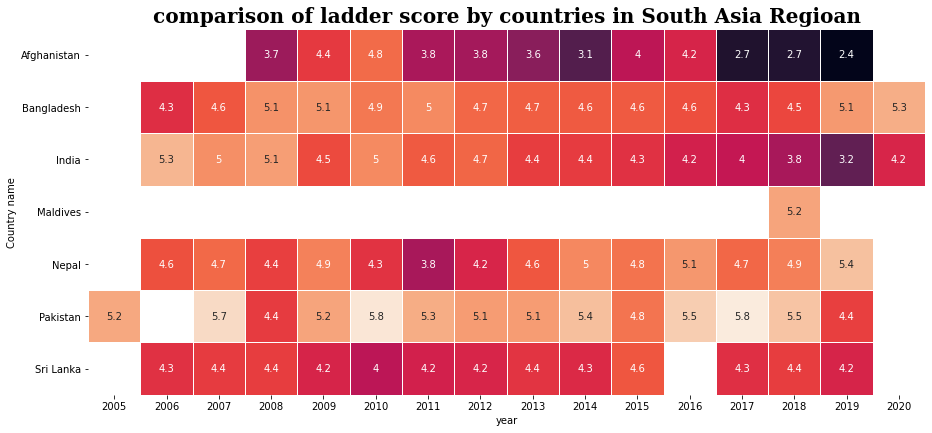

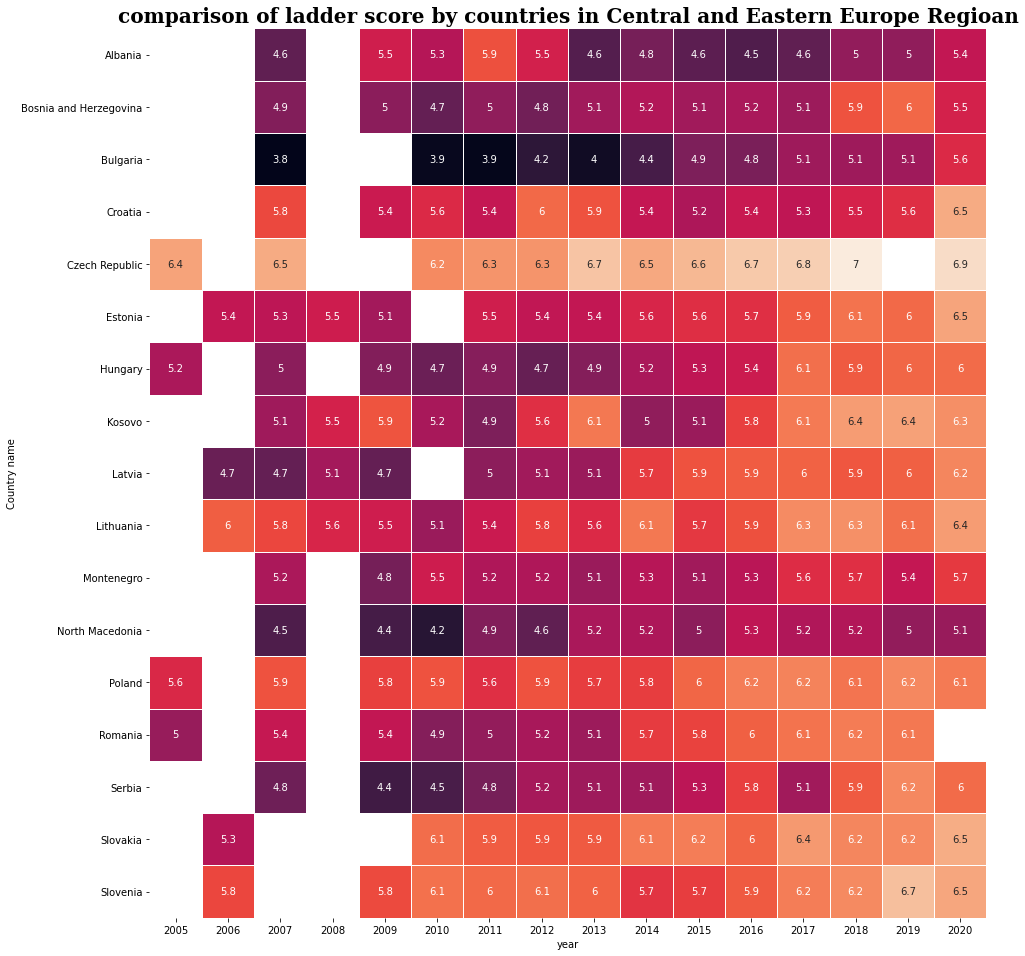

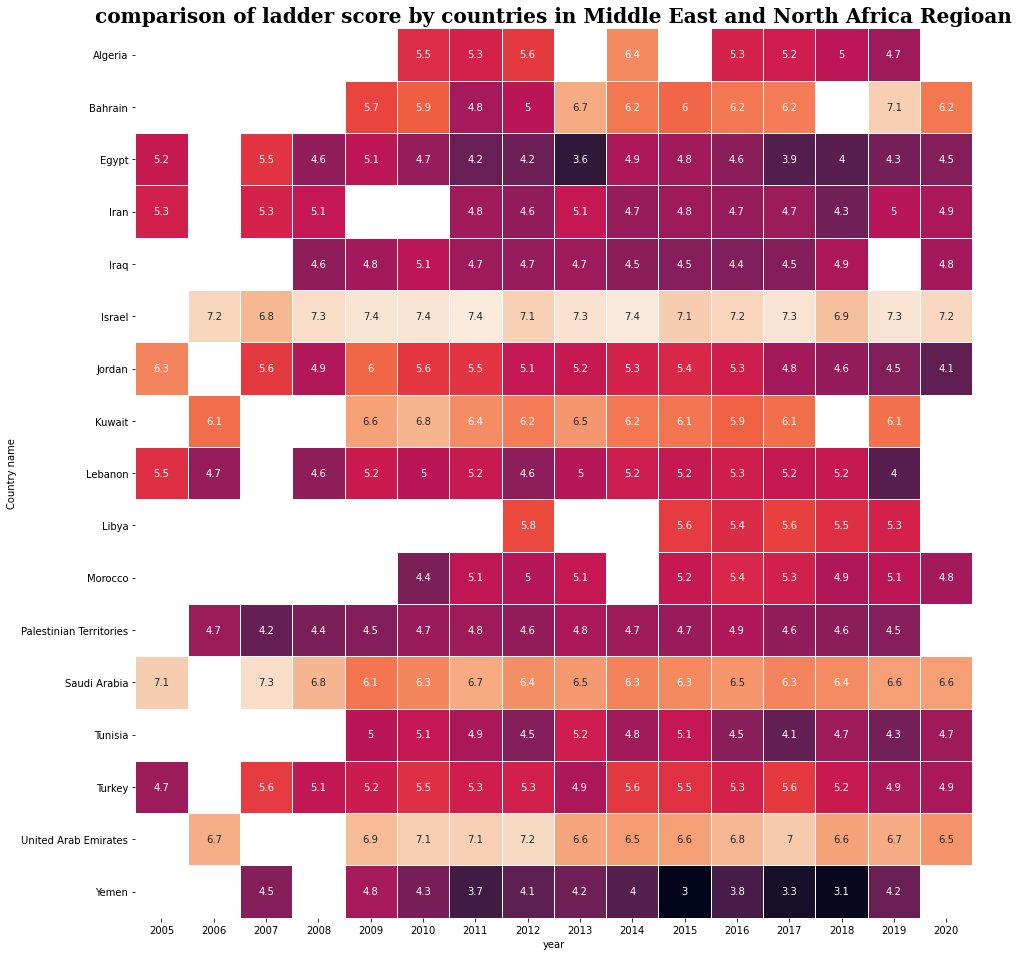

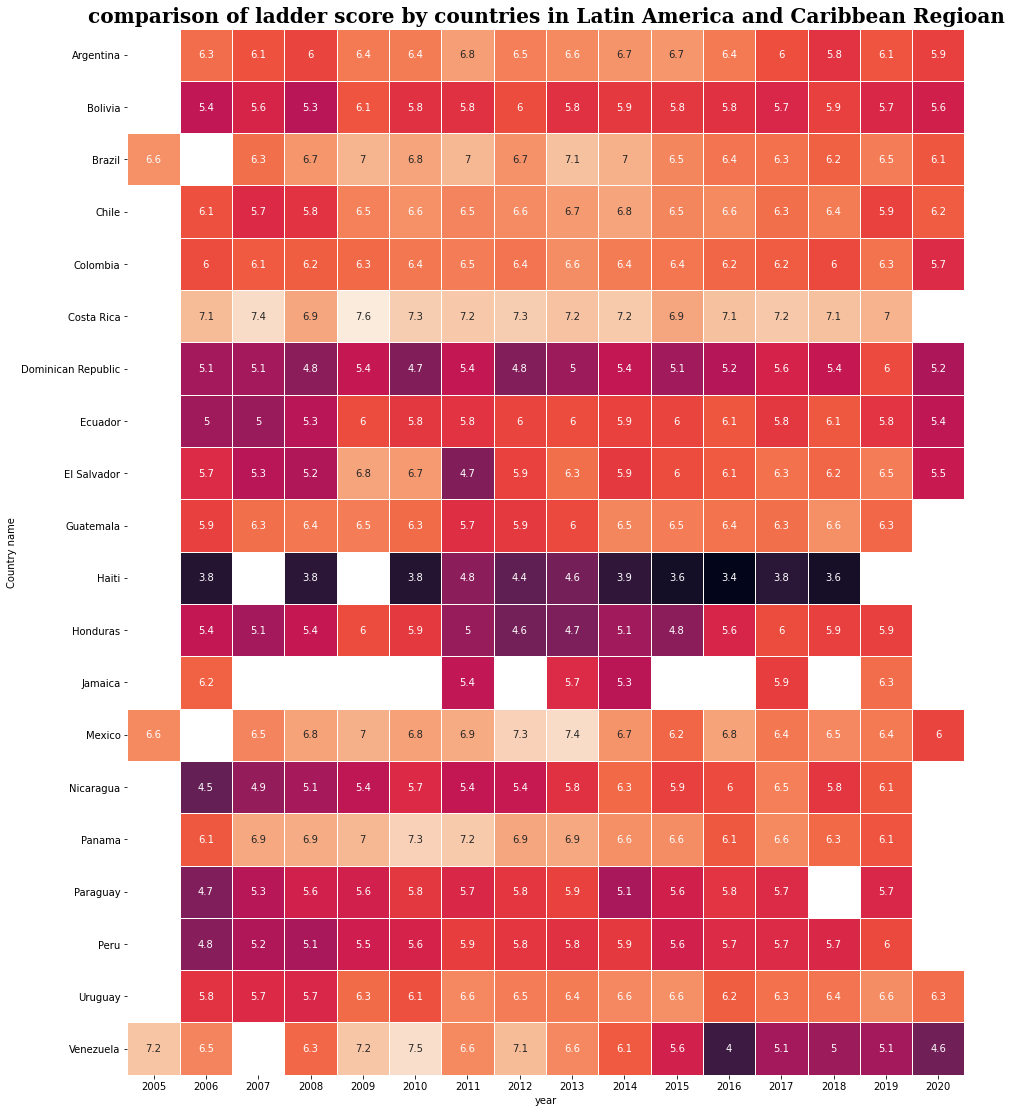

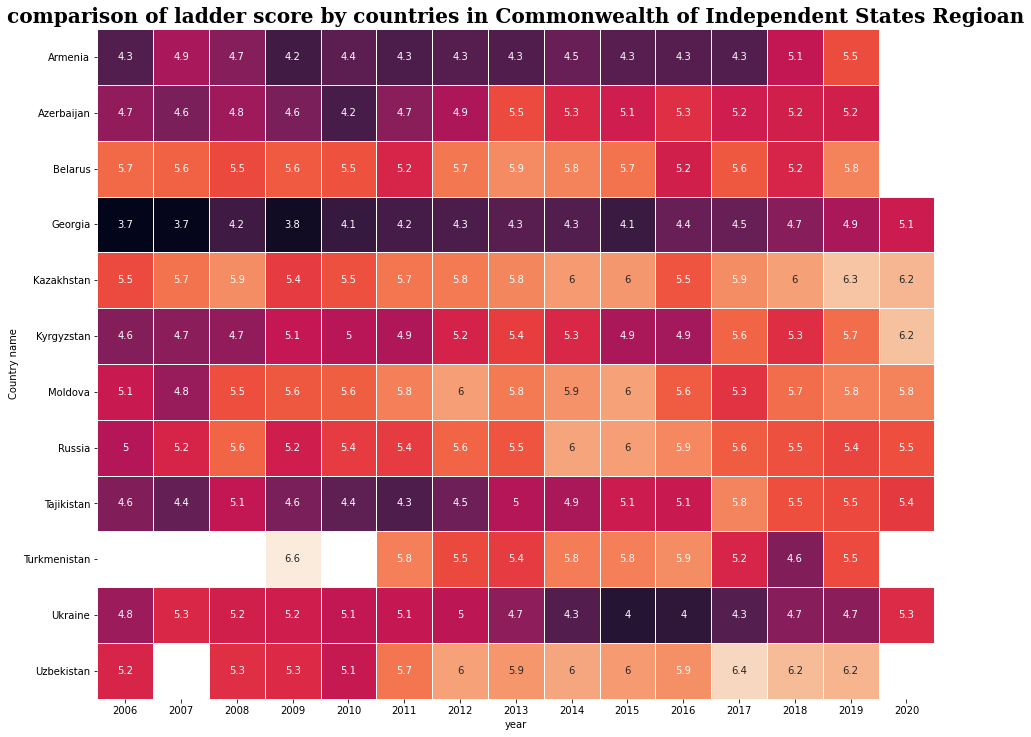

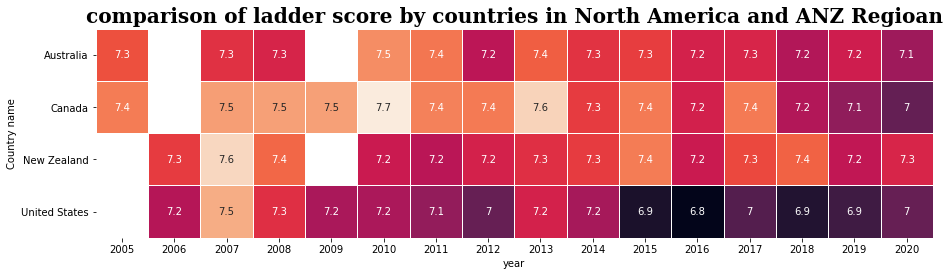

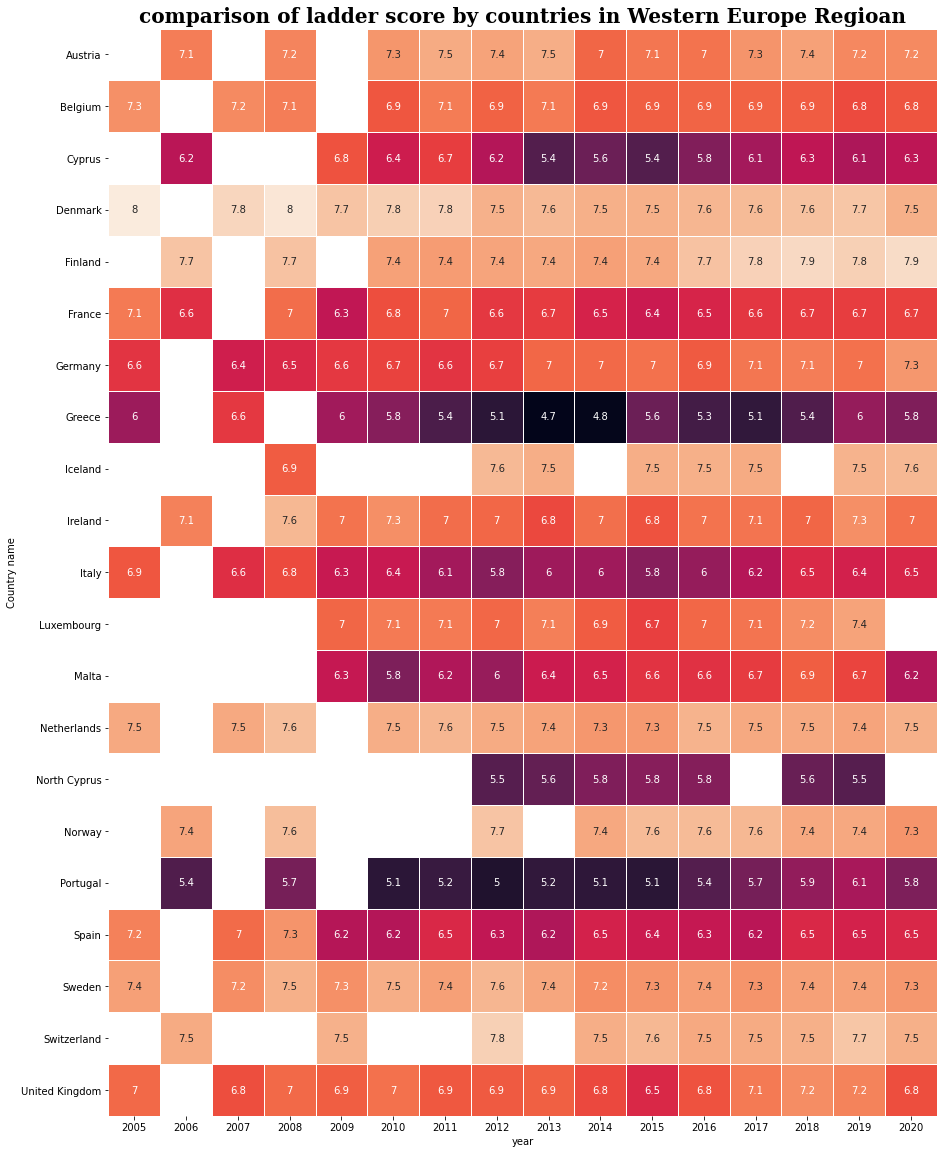

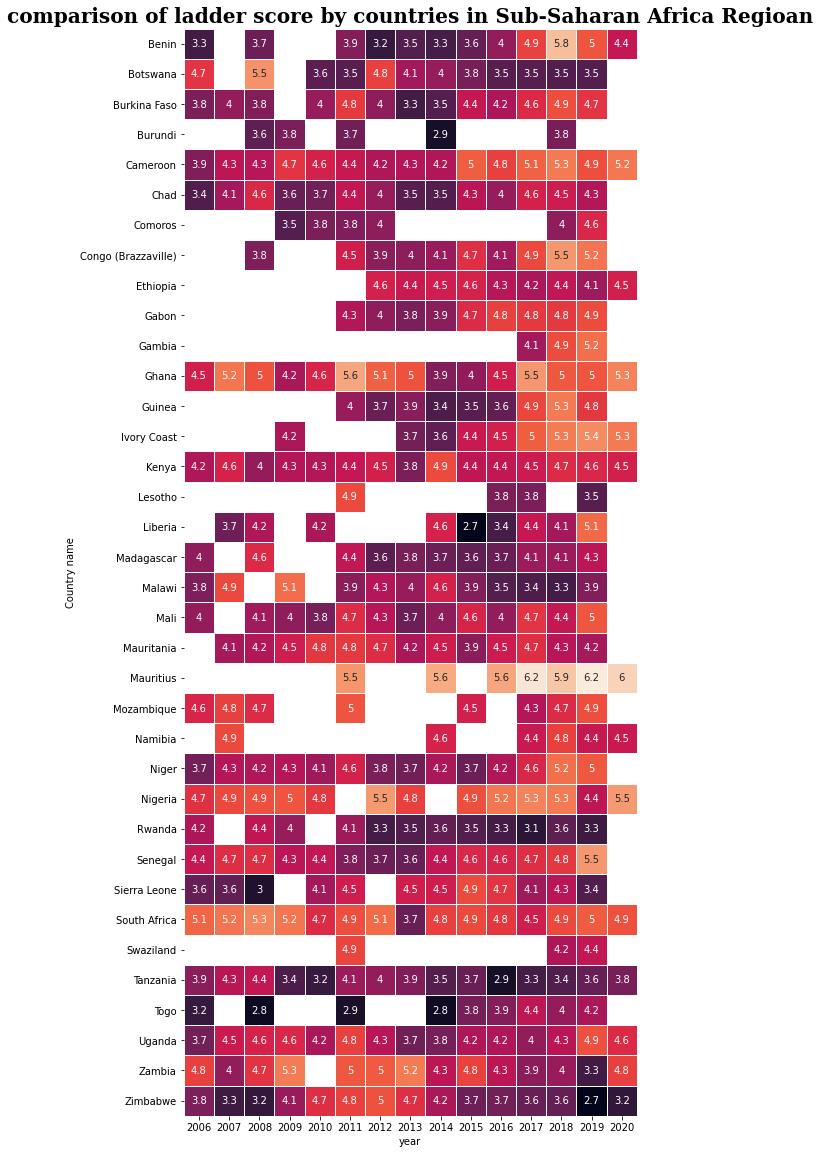

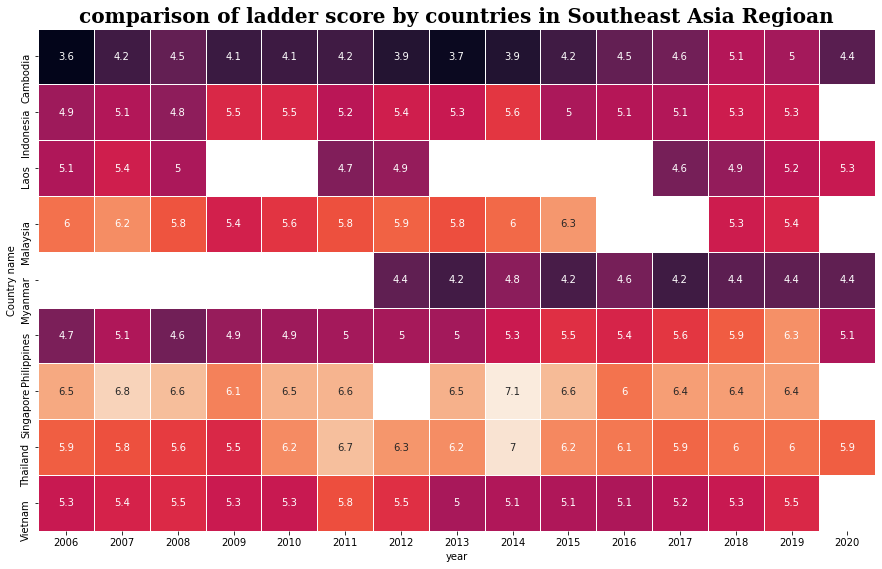

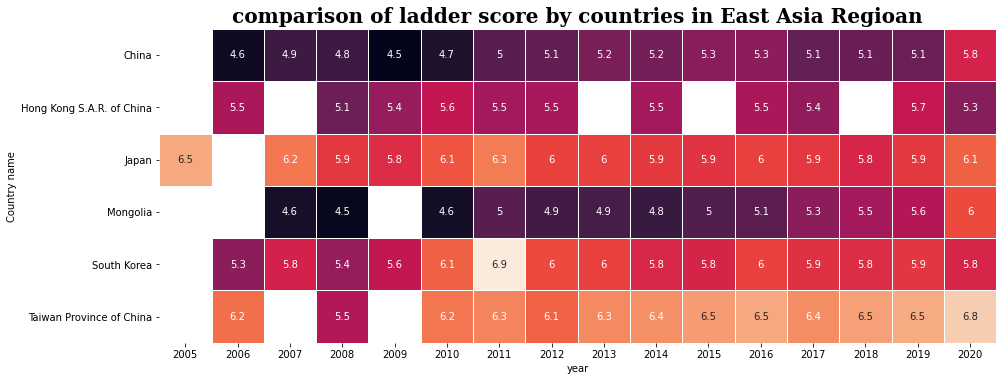

In [ ]:
for region in data6["Regional indicator"].unique():
    _,ax=plt.subplots(figsize=(15,20))
    
    ax.set_title("comparison of ladder score by countries in {} Regioan".format(region),family="Serif",weight="bold",size=20)
    ax=sns.heatmap(data6[data6['Regional indicator']==region].pivot_table(index="Country name", columns="year")['Life Ladder'],annot=True,cbar=False,linewidth=1,square=True)

In [ ]:
data7=data2[data2["Country name"].isin(["Iran","United States"])].loc[:,"Country name":"Life Ladder"]

In [ ]:
data7

Country name  year  Life Ladder
761            Iran  2005        5.308
762            Iran  2007        5.336
763            Iran  2008        5.129
764            Iran  2011        4.768
765            Iran  2012        4.609
766            Iran  2013        5.140
767            Iran  2014        4.682
768            Iran  2015        4.750
769            Iran  2016        4.653
770            Iran  2017        4.717
771            Iran  2018        4.278
772            Iran  2019        5.006
773            Iran  2020        4.865
1836  United States  2006        7.182
1837  United States  2007        7.513
1838  United States  2008        7.280
1839  United States  2009        7.158
1840  United States  2010        7.164
1841  United States  2011        7.115
1842  United States  2012        7.026
1843  United States  2013        7.249
1844  United States  2014        7.151
1845  United States  2015        6.864
1846  United States  2016        6.804
1847  United States  2017        6.992
1848  United States  2018        6.883
1849  United States  2019        6.944
1850  United States  2020        7.028

<Figure size 1296x576 with 0 Axes>

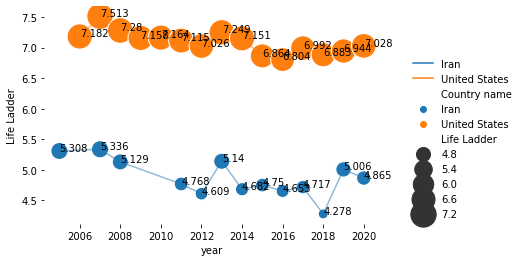

In [ ]:
fig=plt.figure(figsize=(18,8))
ax=plt.subplots()
ax=sns.lineplot(data=data7,x="year",y="Life Ladder",alpha=0.5,hue="Country name")
ax=sns.scatterplot(data=data7,x="year",y="Life Ladder",hue="Country name" ,size="Life Ladder",sizes=(100,700))

for i in range(len(data7)):
    ax.text(x=data7["year"].iloc[i],y=data7["Life Ladder"].iloc[i],s=data7["Life Ladder"].iloc[i])

for s in ["left","right","top","bottom"]:
    ax.spines[s].set_visible(False)

L=ax.legend(frameon=False,loc="upper center",bbox_to_anchor=(1.25,0.8),ncol=1)
plt.show()

In [ ]:
data1.head(10)

Country name     Regional indicator  Ladder score  \
0      Finland         Western Europe         7.842   
1      Denmark         Western Europe         7.620   
2  Switzerland         Western Europe         7.571   
3      Iceland         Western Europe         7.554   
4  Netherlands         Western Europe         7.464   
5       Norway         Western Europe         7.392   
6       Sweden         Western Europe         7.363   
7   Luxembourg         Western Europe         7.324   
8  New Zealand  North America and ANZ         7.277   
9      Austria         Western Europe         7.268   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   
5                           0.035         7.462         7.323   
6                           0.036         7.433         7.293   
7                           0.037         7.396         7.252   
8                           0.040         7.355         7.198   
9                           0.036         7.337         7.198   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   
5                 11.053           0.954                     73.3   
6                 10.867           0.934                     72.7   
7                 11.647           0.908                     72.6   
8                 10.643           0.948                     73.4   
9                 10.906           0.934                     73.3   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   
5                         0.960       0.093                      0.270   
6                         0.945       0.086                      0.237   
7                         0.907      -0.034                      0.386   
8                         0.929       0.134                      0.242   
9                         0.908       0.042                      0.481   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   
5                      2.43                             1.543   
6                      2.43                             1.478   
7                      2.43                             1.751   
8                      2.43                             1.400   
9                      2.43                             1.492   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                  

In [ ]:
data1.tail(10)

Country name            Regional indicator  Ladder score  \
139      Burundi            Sub-Saharan Africa         3.775   
140        Yemen  Middle East and North Africa         3.658   
141     Tanzania            Sub-Saharan Africa         3.623   
142        Haiti   Latin America and Caribbean         3.615   
143       Malawi            Sub-Saharan Africa         3.600   
144      Lesotho            Sub-Saharan Africa         3.512   
145     Botswana            Sub-Saharan Africa         3.467   
146       Rwanda            Sub-Saharan Africa         3.415   
147     Zimbabwe            Sub-Saharan Africa         3.145   
148  Afghanistan                    South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
139                           0.107         3.985         3.565   
140                           0.070         3.794         3.521   
141                           0.071         3.762         3.485   
142                           0.173         3.953         3.276   
143                           0.092         3.781         3.419   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
139                  6.635           0.490                   53.400   
140                  7.578           0.832                   57.122   
141                  7.876           0.702                   57.999   
142                  7.477           0.540                   55.700   
143                  6.958           0.537                   57.948   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
139                         0.626      -0.024                      0.607   
140                         0.602      -0.147                      0.800   
141                         0.833       0.183                      0.577   
142                         0.593       0.422                      0.721   
143                         0.780       0.038                      0.729   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
139                      2.43                             0.000   
140                      2.43                             0.329   
141                      2.43                             0.433   
142                      2.43                             0.294   
143                      2.43                             0.113   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                             0.370   

     Explained by: Social support  Explained by: Healthy life expectancy  \
139                         0.062                                  0.155   
140                         0.831                   

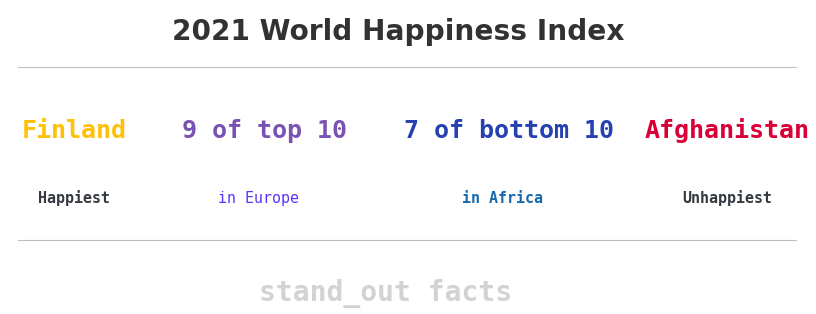

In [ ]:
import matplotlib.lines as lines
fig, f1_axes = plt.subplots(ncols=1, nrows=1)
f1_axes.text(1.167,0.85,"2021 World Happiness Index",color='#323232',fontsize=28, fontweight='bold', fontfamily='sanserif',ha="center")

l1=lines.Line2D([0.15,1.95],[0.67,0.67],transform=fig.transFigure,figure=fig,color="gray",linestyle="-",linewidth=1.1,alpha=0.5)
fig.lines.extend([l1])

f1_axes.text(1.13,-0.35,"stand_out facts",color="lightgray",fontsize=28,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(0.77,0.4,"9 of top 10",color="#7952B3",fontsize=25,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(0.75,0.1,"in Europe",color="#5C33F6",fontsize=15,fontfamily="monospace",ha="center")
f1_axes.text(1.5,0.4,"7 of bottom 10",color="#2541B2",fontsize=25,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(1.48,0.1,"in Africa",color="#1768AC",fontsize=15,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(0.2,0.4,"Finland",color="#FFC107",fontsize=25,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(0.2,0.1,"Happiest",color="#343A40",fontsize=15,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(2.15,0.4,"Afghanistan",color="#DA0037",fontsize=25,fontweight="bold",fontfamily="monospace",ha="center")
f1_axes.text(2.15,0.1,"Unhappiest",color="#343A40",fontsize=15,fontfamily="monospace",fontweight="bold",ha="center")

l2=lines.Line2D([0.15,1.95],[0.07,0.07],transform=fig.transFigure,figure=fig,color="gray",linestyle="-",linewidth=1.1,alpha=0.5)               
f1_axes.lines.extend([l2])

f1_axes.set_yticklabels("")
f1_axes.set_xticklabels("")
f1_axes.tick_params(axis="both",width=0)

for s in ["left","right","bottom","top"]:
    f1_axes.spines[s].set_visible(False)

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

In [ ]:
data2


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

In [ ]:
top=data2.loc[data2.groupby("year")["Life Ladder"].idxmax()]
bottom=data2.loc[data2.groupby("year")["Life Ladder"].idxmin()]

happy=data1.groupby("Country name")["Ladder score"].mean().sort_values(ascending=False)[:10]
unhappy=data1.groupby("Country name")["Ladder score"].mean().sort_values(ascending=True)[:10]

top_bottom=happy.append(unhappy,ignore_index=False).sort_values(ascending=True)

In [ ]:
top


Country name  year  Life Ladder  Log GDP per capita  Social support  \
449       Denmark  2005        8.019              10.851           0.972   
551       Finland  2006        7.672              10.745           0.965   
450       Denmark  2007        7.834              10.891           0.954   
451       Denmark  2008        7.971              10.880           0.954   
452       Denmark  2009        7.683              10.824           0.939   
453       Denmark  2010        7.771              10.839           0.975   
454       Denmark  2011        7.788              10.848           0.962   
1654  Switzerland  2012        7.776              11.079           0.947   
300        Canada  2013        7.594              10.757           0.936   
457       Denmark  2014        7.508              10.862           0.956   
1304       Norway  2015        7.603              11.033           0.947   
559       Finland  2016        7.660              10.740           0.954   
560       Finland  2017        7.788              10.768           0.964   
561       Finland  2018        7.858              10.783           0.962   
562       Finland  2019        7.780              10.792           0.937   
563       Finland  2020        7.889              10.750           0.962   

      Healthy life expectancy at birth  Freedom to make life choices  \
449                              69.60                         0.971   
551                              69.76                         0.969   
450                              69.92                         0.932   
451                              70.08                         0.970   
452                              70.24                         0.949   
453                              70.40                         0.944   
454                              70.62                         0.935   
1654                             72.78                         0.945   
300                              72.68                         0.916   
457                              71.28                         0.942   
1304                             72.90                         0.948   
559                              71.70                         0.948   
560                              71.80                         0.962   
561                              71.90                         0.938   
562                              72.00                         0.948   
563                              72.10                         0.962   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
449          NaN                      0.237            0.860            0.154  
551       -0.005                      0.132            0.722            0.172  
450        0.240                      0.206            0.828            0.194  
451        0.272                      0.248            0.757            0.163  
452        0.264                      0.206            0.749            0.234  
453        0.242                      0.175            0.785            0.155  
454        0.298                      0.220            0.769            0.175  
1654       0.139                      0.323            0.859            0.176  
300        0.316                      0.406            0.851            0.263  
457        0.118                      0.237            0.832            0.233  
1304       0.257                      0.299            0.843            0.209  
559       -0.027                      0.250            0.797            0.182  
560       -0.002                      0.192            0.787            0.176  
561       -0.127                      0.199            0.782            0.182  
562       -0.052                      0.195            0.755            0.181  
563       -0.116                      0.164            0.744            0.193

In [ ]:
type(top)

pandas.core.frame.DataFrame

In [ ]:
type(top_5)

pandas.core.series.Series

In [ ]:
top_5

Country name
Denmark        7.680400
Finland        7.597154
Switzerland    7.548300
Norway         7.512400
Netherlands    7.466286
Name: Life Ladder, dtype: float64

In [ ]:
happy

Country name
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
Norway         7.392
Sweden         7.363
Luxembourg     7.324
New Zealand    7.277
Austria        7.268
Name: Ladder score, dtype: float64

In [ ]:
top

Country name  year  Life Ladder  Log GDP per capita  Social support  \
449       Denmark  2005        8.019              10.851           0.972   
551       Finland  2006        7.672              10.745           0.965   
450       Denmark  2007        7.834              10.891           0.954   
451       Denmark  2008        7.971              10.880           0.954   
452       Denmark  2009        7.683              10.824           0.939   
453       Denmark  2010        7.771              10.839           0.975   
454       Denmark  2011        7.788              10.848           0.962   
1654  Switzerland  2012        7.776              11.079           0.947   
300        Canada  2013        7.594              10.757           0.936   
457       Denmark  2014        7.508              10.862           0.956   
1304       Norway  2015        7.603              11.033           0.947   
559       Finland  2016        7.660              10.740           0.954   
560       Finland  2017        7.788              10.768           0.964   
561       Finland  2018        7.858              10.783           0.962   
562       Finland  2019        7.780              10.792           0.937   
563       Finland  2020        7.889              10.750           0.962   

      Healthy life expectancy at birth  Freedom to make life choices  \
449                              69.60                         0.971   
551                              69.76                         0.969   
450                              69.92                         0.932   
451                              70.08                         0.970   
452                              70.24                         0.949   
453                              70.40                         0.944   
454                              70.62                         0.935   
1654                             72.78                         0.945   
300                              72.68                         0.916   
457                              71.28                         0.942   
1304                             72.90                         0.948   
559                              71.70                         0.948   
560                              71.80                         0.962   
561                              71.90                         0.938   
562                              72.00                         0.948   
563                              72.10                         0.962   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
449          NaN                      0.237            0.860            0.154  
551       -0.005                      0.132            0.722            0.172  
450        0.240                      0.206            0.828            0.194  
451        0.272                      0.248            0.757            0.163  
452        0.264                      0.206            0.749            0.234  
453        0.242                      0.175            0.785            0.155  
454        0.298                      0.220            0.769            0.175  
1654       0.139                      0.323            0.859            0.176  
300        0.316                      0.406            0.851            0.263  
457        0.118                      0.237            0.832            0.233  
1304       0.257                      0.299            0.843            0.209  
559       -0.027                      0.250            0.797            0.182  
560       -0.002                      0.192            0.787            0.176  
561       -0.127                      0.199            0.782            0.182  
562       -0.052                      0.195            0.755            0.181  
563       -0.116                      0.164            0.744            0.193

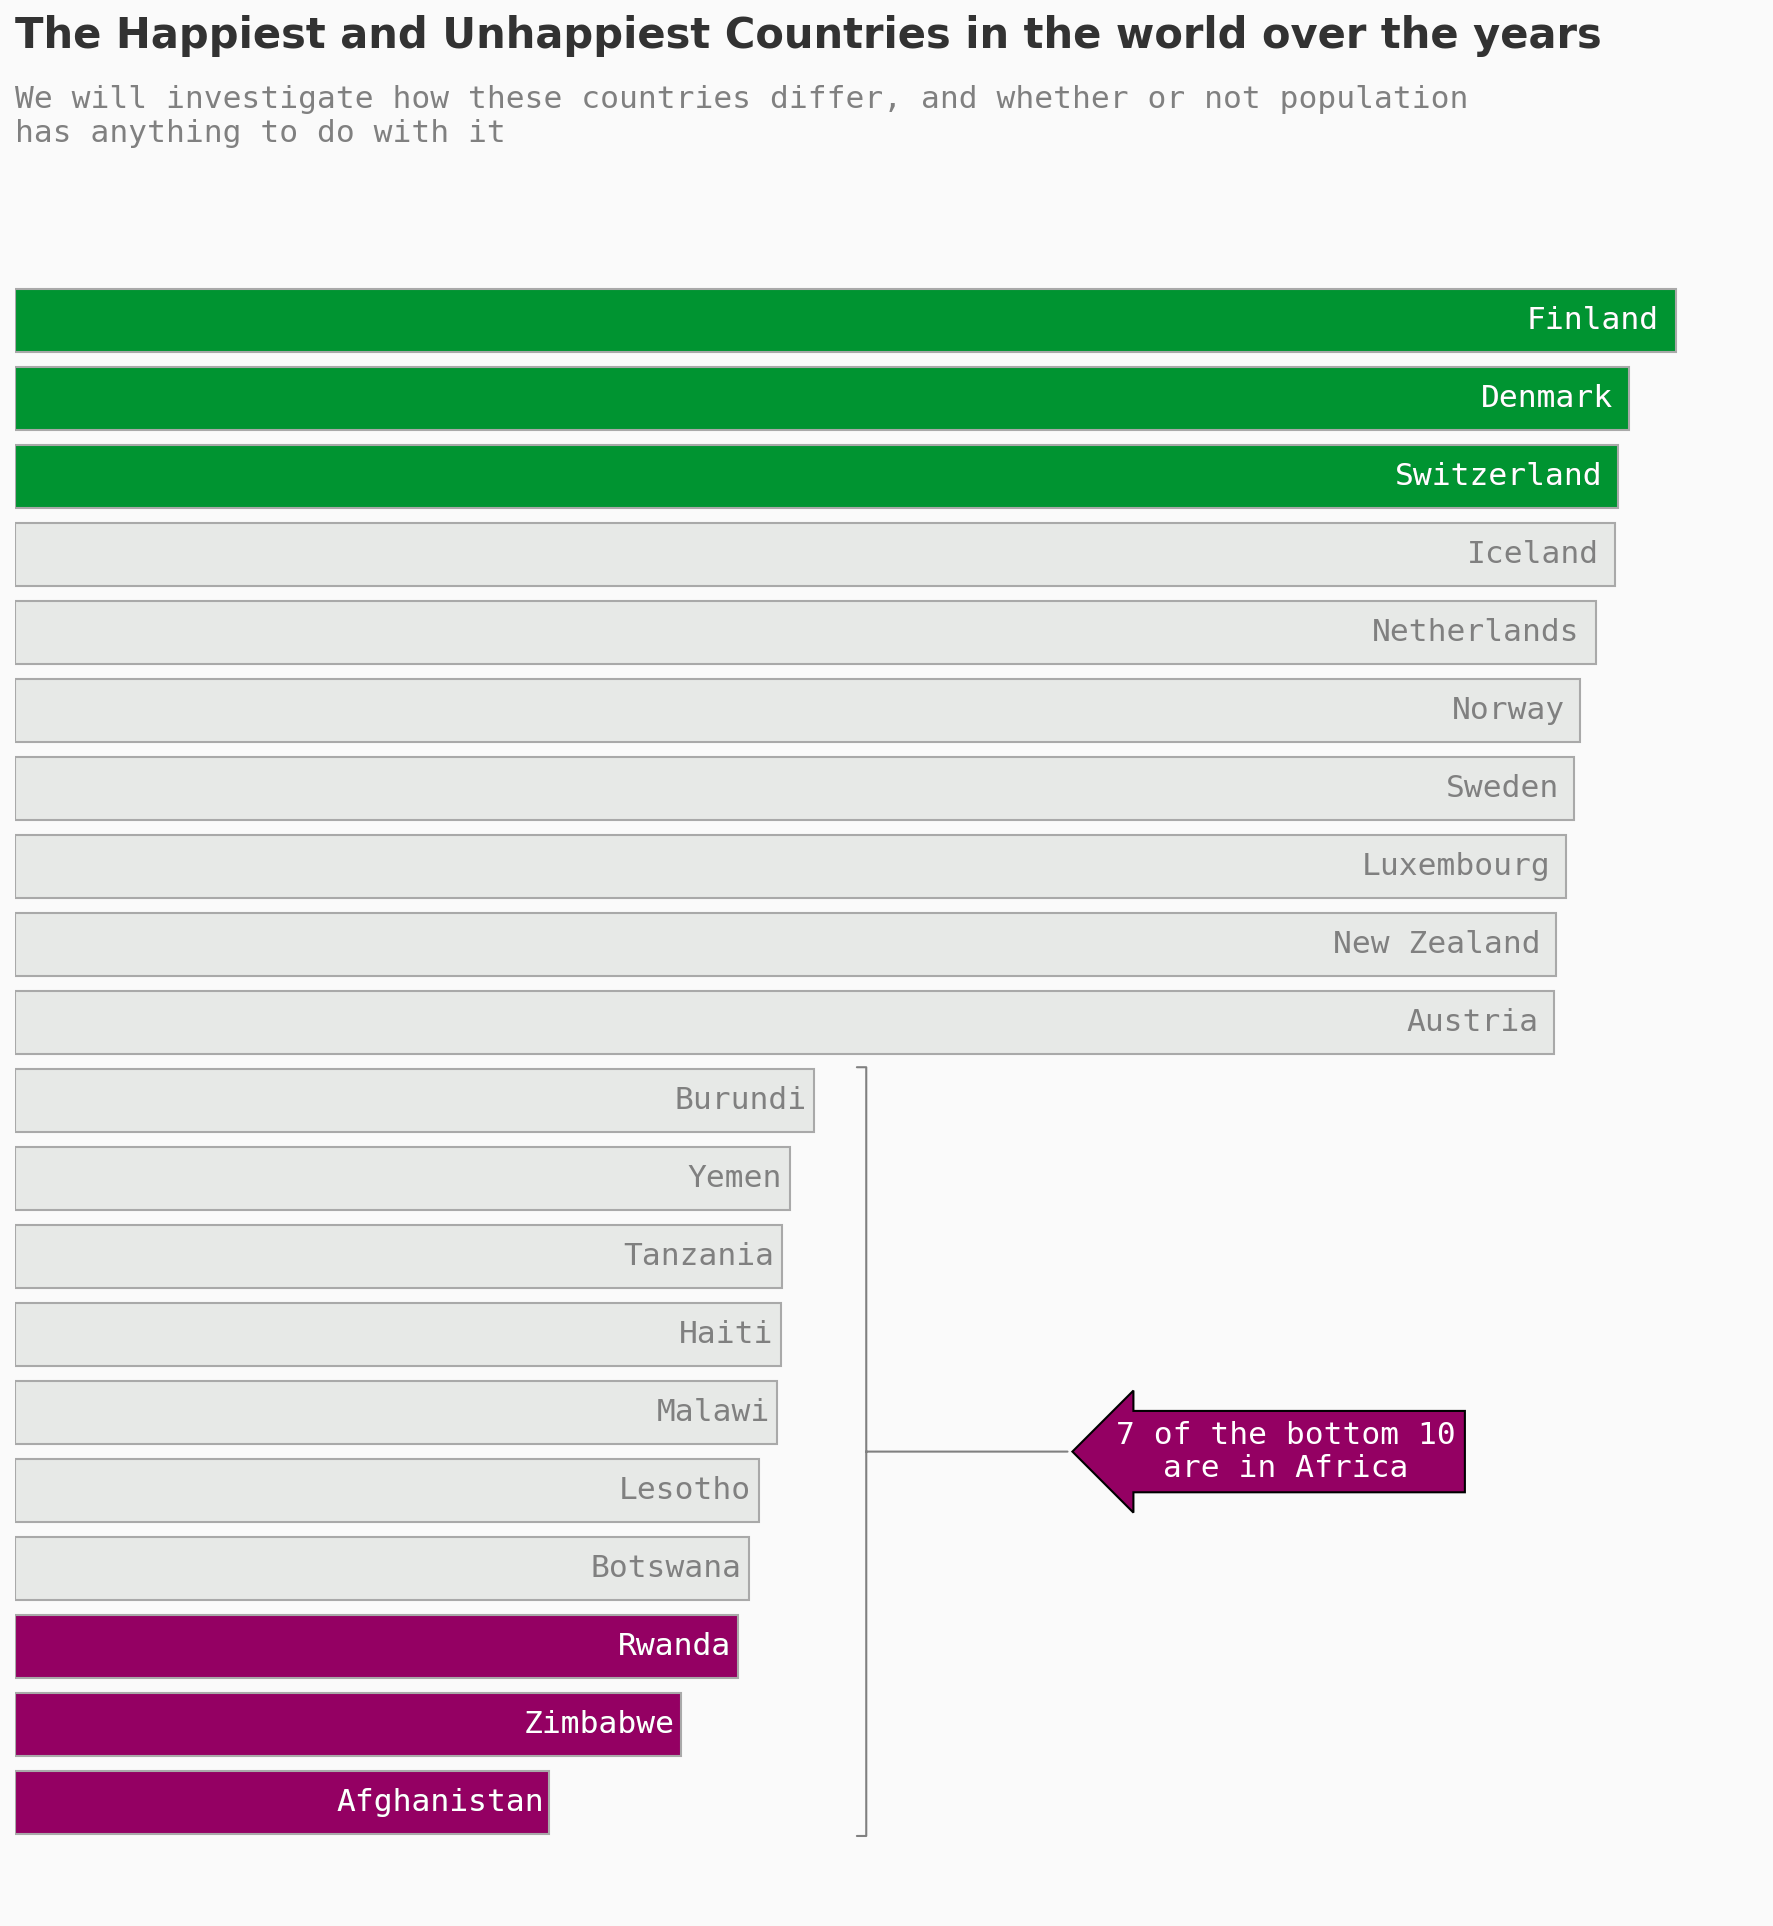

In [ ]:
fig=plt.figure(figsize=(15,15),dpi=150)
gs=fig.add_gridspec(1,1)
gs.update(wspace=0.05,hspace=0.27)
ax0=fig.add_subplot(gs[0,0])

back_color="#fafafa"
fig.patch.set_facecolor(back_color)
ax0.set_facecolor(back_color)

data=top_bottom

color_map=["#e7e9e7" for _ in range(20)]
color_map[0]=color_map[1]=color_map[2]="#940063"
color_map[17]=color_map[18]=color_map[19]="#009431"

ax0.barh(data.index,data,edgecolor="darkgray",color=color_map)

for i in range(0,20):
    ax0.annotate(list(data.index)[i],xy=(data[i]-data[i]*0.01,i),va="center",ha="right",  fontweight="light",fontfamily="monospace",fontsize=15,color="gray",rotation=0)
    
for i in range(0,3):
    
    ax0.annotate(list(data.index)[i],xy=(data[i]-(data[i]*0.01),i),va="center",ha="right",fontweight="light",fontfamily="monospace",fontsize=15,color="white",rotation=0)
        
for i in range(17,20):
    
    ax0.annotate(list(data.index)[i],xy=(data[i]-(data[i]*0.01),i),va="center",ha="right",fontweight="light",fontfamily="monospace",fontsize=15,color="white",rotation=0)
    
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
for s in ["left","right","bottom","top"]:
    ax0.spines[s].set_visible(False)

ax0.text(0,22.5,"The Happiest and Unhappiest Countries in the world over the years",fontfamily="sans-serif",fontsize=20,fontweight="bold",color="#323232")

ax0.text(0,21.3,'We will investigate how these countries differ, and whether or not population\nhas anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

ax0.annotate("7 of the bottom 10\nare in Africa",xy=(4,4.5),xytext=(6,4.5),xycoords="data",fontsize=15,ha="center",va="center",fontfamily="monospace",
            bbox=dict(boxstyle="larrow",fc="#940063"),arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3',lw=1,color="gray"),color="white")

plt.show()

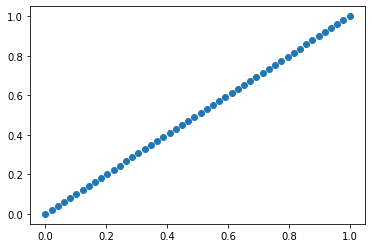

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0,1)
ax.plot(x, x, 'o')

# ax.annotate('default line', xy=(0.15,0.1), xytext=(0.6,0.1),
#             arrowprops={'arrowstyle': '-'}, va='center')
# ax.annotate('dashed line', xy=(0.25,0.2), xytext=(0.6,0.2),
#             arrowprops={'arrowstyle': '-', 'ls': 'dashed'}, va='center')
# ax.annotate('default arrow', xy=(0.35,0.3), xytext=(0.6,0.3),
#             arrowprops={'arrowstyle': '->'}, va='center')
# ax.annotate('thick blue arrow', xy=(0.45,0.4), xytext=(0.6,0.4),
#             arrowprops={'arrowstyle': '->', 'lw': 4, 'color': 'blue'},
#             va='center')
# ax.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5),
#             arrowprops={'arrowstyle': '<->'}, va='center')
# ax.annotate('arrow with closed head', xy=(0.55,0.6), xytext=(0.1,0.6),
#             arrowprops={'arrowstyle': '-|>'}, va='center')
# ax.annotate('a really thick red arrow\nwith not much space', xy=(0.65,0.7),
#             xytext=(0.1,0.7), va='center', multialignment='right',
#             arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r'})
# ax.annotate('a really thick red arrow\nwith space between\nthe tail and the'
#             'label', xy=(0.85,0.9), xytext=(0.1,0.9), va='center',
#             multialignment='right',
#             arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r', 'shrinkA': 10})

plt.show()

In [ ]:
top=data2.loc[data2.groupby("year")["Life Ladder"].idxmax()]
bottom=data2.loc[data2.groupby("year")["Life Ladder"].idxmin()]

unhappy=data1.groupby("Country name")["Ladder score"].mean().sort_values(ascending=True)[:10]
happy=data1.groupby("Country name")["Ladder score"].mean().sort_values(ascending=False)[:10]

top_bottom=happy.append(unhappy,ignore_index=False).sort_values(ascending=True)


In [ ]:
happy

Country name
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
Norway         7.392
Sweden         7.363
Luxembourg     7.324
New Zealand    7.277
Austria        7.268
Name: Ladder score, dtype: float64

In [ ]:
unhappy

Country name
Afghanistan    2.523
Zimbabwe       3.145
Rwanda         3.415
Botswana       3.467
Lesotho        3.512
Malawi         3.600
Haiti          3.615
Tanzania       3.623
Yemen          3.658
Burundi        3.775
Name: Ladder score, dtype: float64

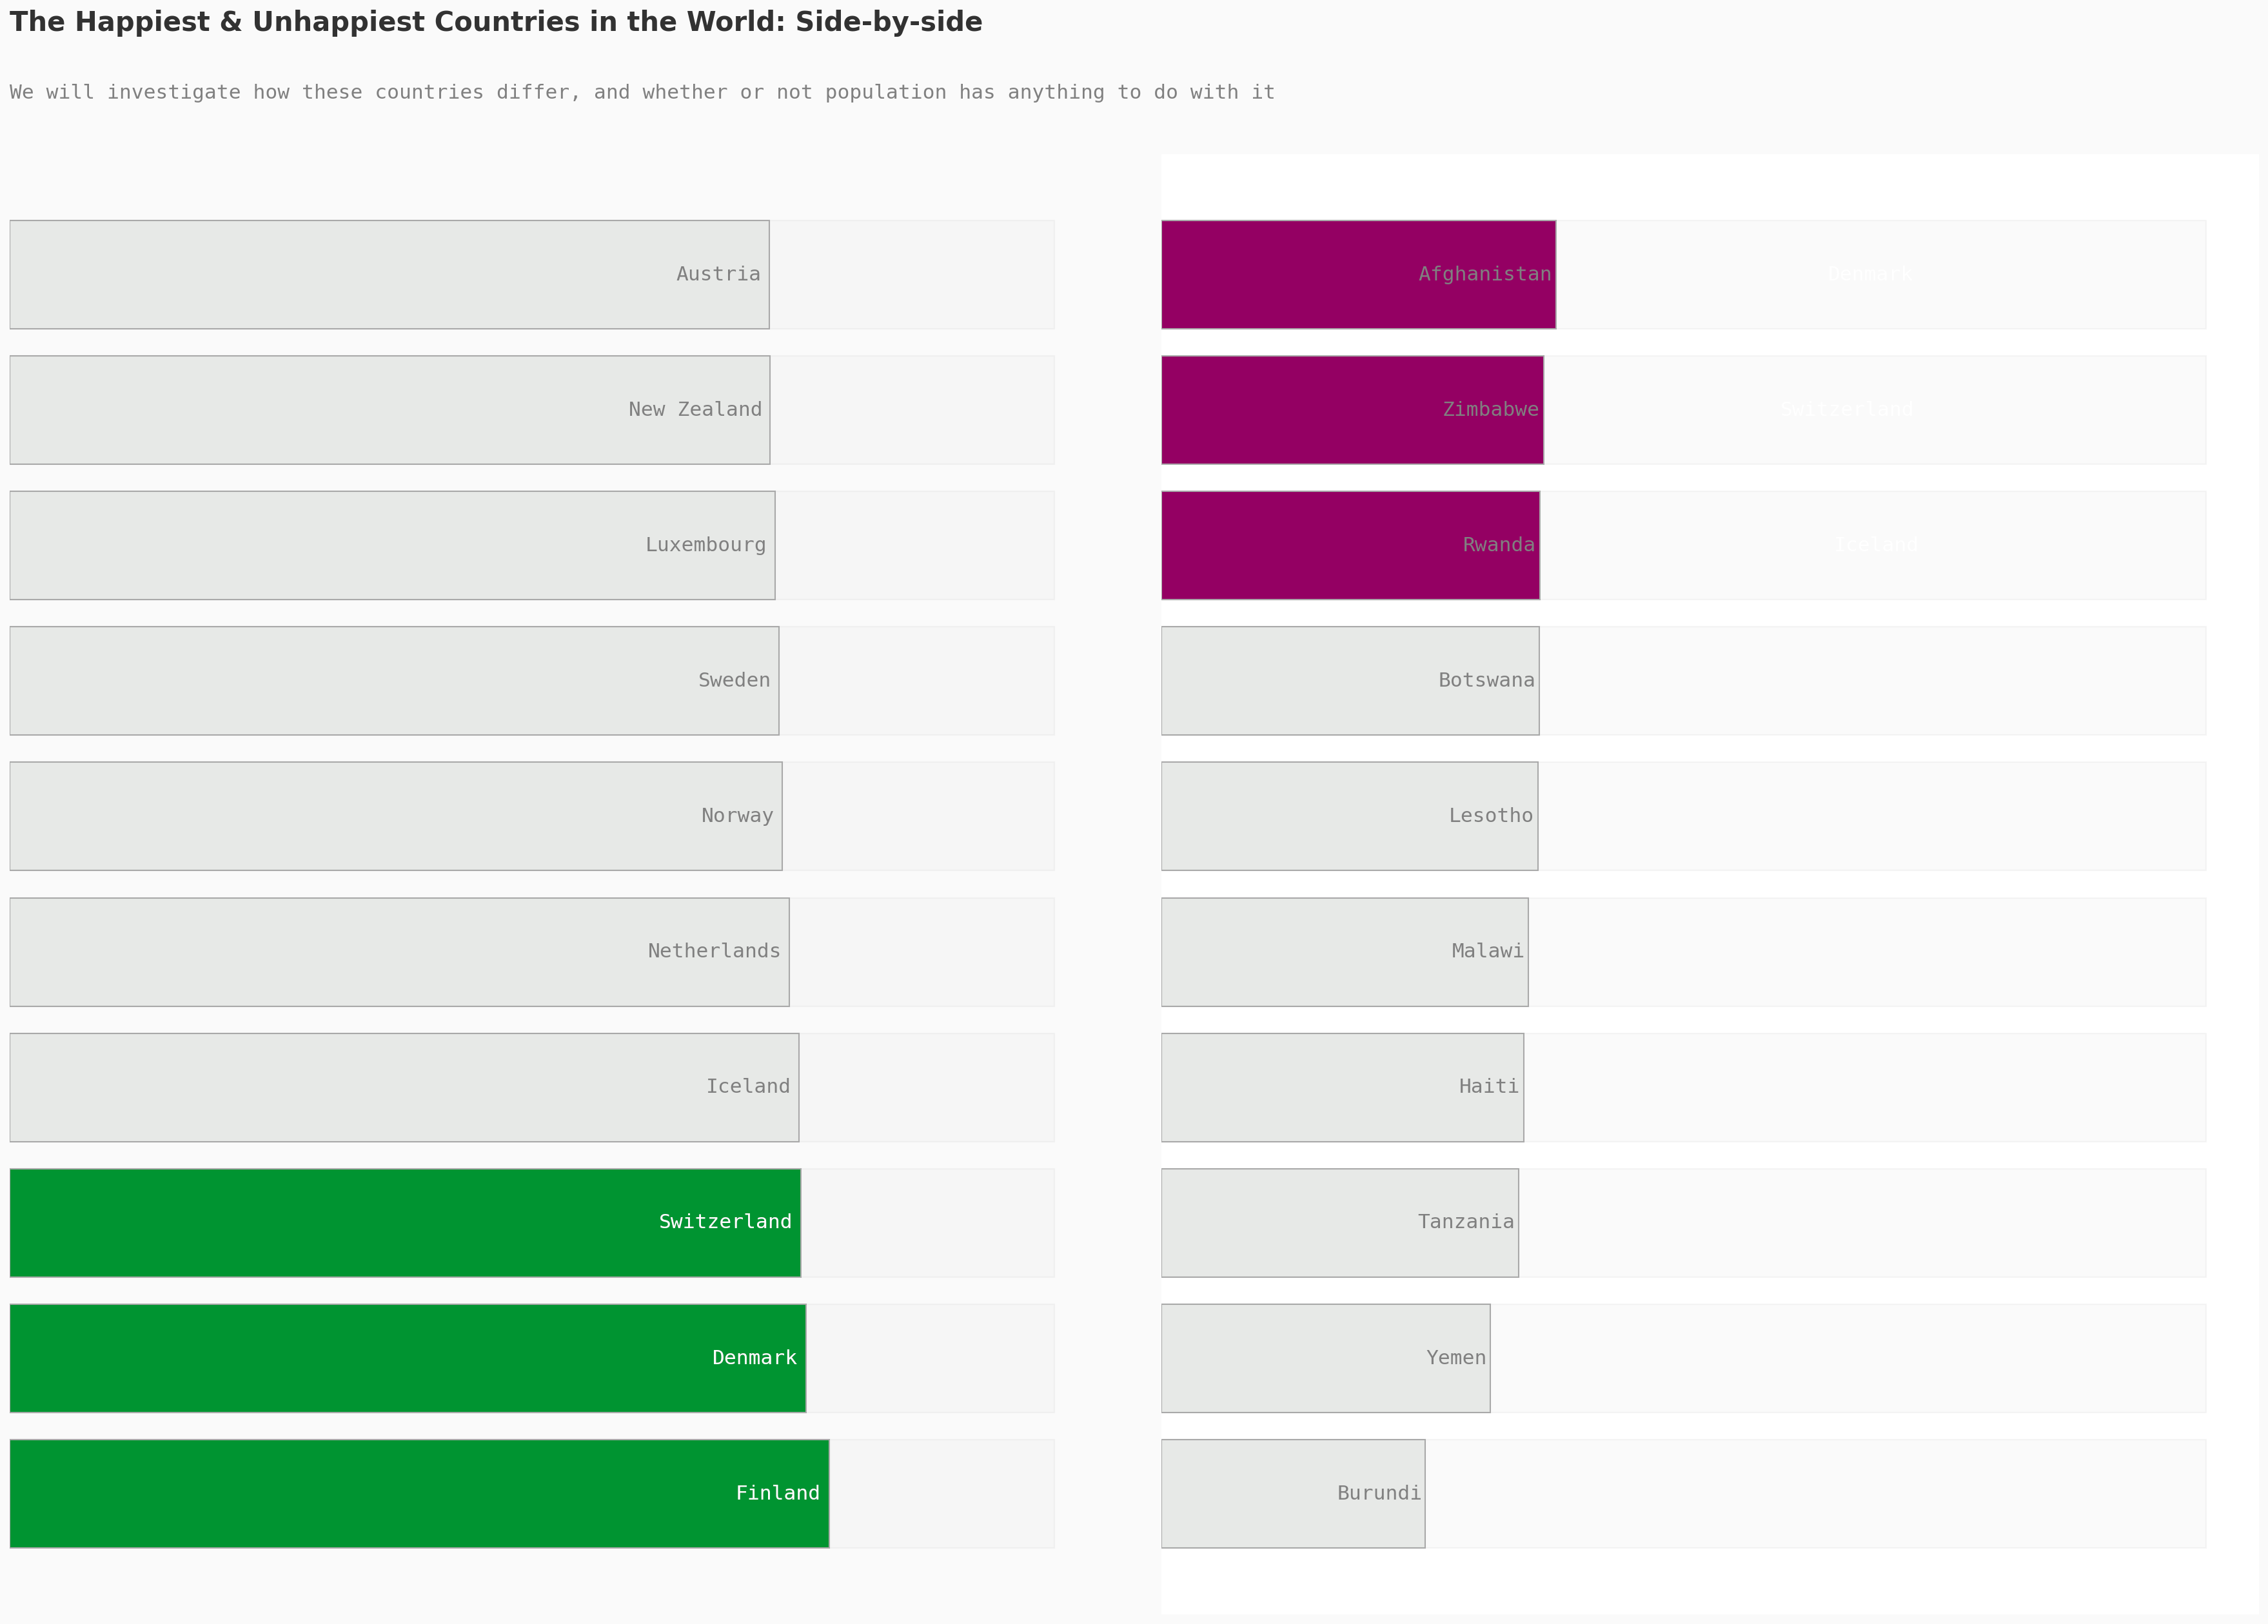

In [ ]:
fig=plt.figure(figsize=(30,20),dpi=150)
gs=fig.add_gridspec(1,2)
gs.update(wspace=0.05,hspace=0.27)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])


background_color="#fafafa"

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] ="#009431"
color_map1 = ['#e7e9e7' for _ in range(10)]
color_map1[7]=color_map1[8]=color_map1[9]="#940063"

ax0.barh(happy.index,10,edgecolor="darkgray",color="lightgray",alpha=0.1)
ax0.barh(happy.index, happy, edgecolor='darkgray',color=color_map)

ax1.barh(unhappy.index[::-1],10,edgecolor="darkgray",color="lightgray",alpha=0.1)
ax1.barh(unhappy.index[::-1], unhappy, edgecolor='darkgray',color=color_map1)


for i in range(0,10):
    ax0.annotate(list(happy.index)[i], xy=(happy[i]-(happy[i]*0.01), i),va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)


for i in range(0,3):
    ax0.annotate(list(happy.index)[i],xy=(happy[i]-(happy[i]*0.01),i),va="center",ha="right",fontweight="light",fontfamily='monospace',fontsize=15,color="white",rotation=0)



for i in range(0,10):
    ax1.annotate(list(unhappy.index)[9-i],xy=(unhappy[i]-(unhappy[i]*0.01),i),va="center",ha="right",fontweight="light",fontfamily="monospace",fontsize=15,color="gray",rotation=0)

    
for i in range(7,10):
    ax1.annotate(list(happy.index)[10-i],xy=(happy[i]-(happy[i]*0.01),i),va="center",ha="right",fontweight="light",fontfamily='monospace',fontsize=15,color="white",rotation=0)


ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])


ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])


for s in ["left","right","bottom","top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    
ax0.text(0,10.8,'The Happiest & Unhappiest Countries in the World: Side-by-side',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,10.3,'We will investigate how these countries differ, and whether or not population has anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

    
    
plt.show()

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

In [ ]:
happiest_mean=data1["Ladder score"].mean()

data1["lower_happy"]=data1["Ladder score"].apply(lambda x:0 if x<happiest_mean else 1)

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  ...  Perceptions of corruption  \
0                           0.949  ...                      0.186   
1                           0.946  ...                      0.179   
2                           0.919  ...                      0.292   
3                           0.955  ...                      0.673   
4                           0.913  ...                      0.338   
..                            ...  ...                        ...   
144                         0.715  ...                      0.915   
145                         0.824  ...                      0.801   
146                         0.897  ...                      0.167   
147                         0.677  ...                      0.821   
148                         0.382  ...                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                             0.370   

     Explained by: Social support  Explained by: Healthy life e

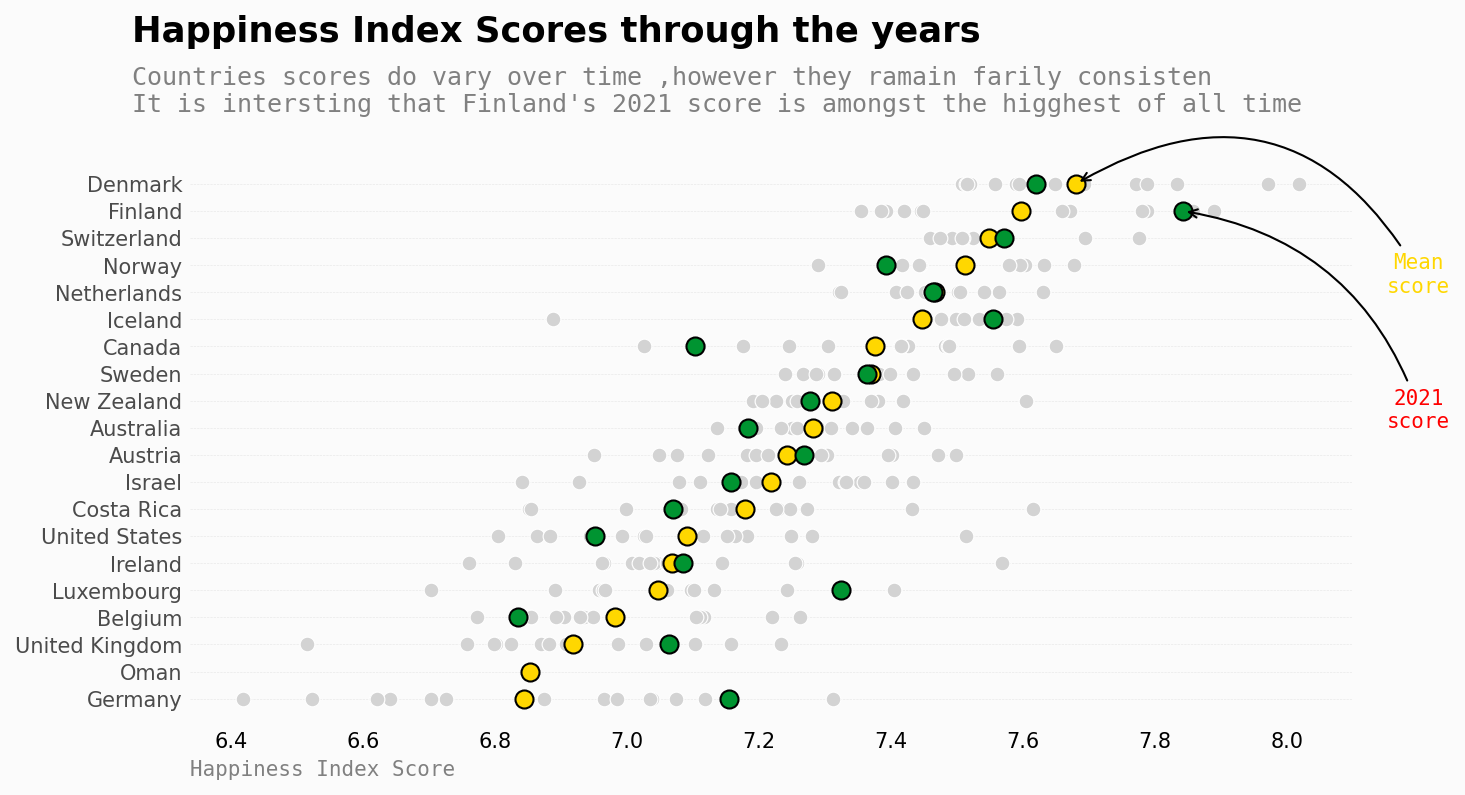

In [ ]:
background="#fbfbfb"
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

top_list=data2.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False).reset_index()[0:20].sort_values(by="Life Ladder",ascending=True)


plot=1

for country in top_list["Country name"]:
    mean=data2[data2["Country name"]== country].groupby("Country name")["Life Ladder"].mean()
    sns.scatterplot(data=data2[data2["Country name"]== country],y=plot ,x="Life Ladder", color="lightgray",s=50,ax=ax)
    sns.scatterplot(data=data2[data2["Country name"]== country],y=plot,x=mean,color="gold",ec="black",linewidth=1,s=75,ax=ax)
    sns.scatterplot(data=data1[data1["Country name"]== country],y=plot,x="Ladder score",color="#009431",ec="black",linewidth=1,s=75,ax=ax)
    plot+=1
    

ax.set_yticks(top_list.index+1)    
ax.set_yticklabels(top_list["Country name"][::-1],fontdict={"horizontalalignment":"right"},alpha=0.7)

ax.tick_params(axis="both",which="both",length=0)
ax.set_xlabel("Happiness Index Score",fontfamily="monospace",loc="left",color="gray")


for s in ["left","right","bottom","top"]:
    ax.spines[s].set_visible(False)

    
x_start,x_end=ax.get_xlim()
y_start,y_end=ax.get_ylim()


ax.yaxis.grid(True, color ="lightgray", lw =0.3,linestyle="--",alpha=0.5)
# ax.hlines(y=top_list.index+1,xmin=x_start,xmax=x_end,color="lightgray",linewidth=0.3,linestyle="--",alpha=0.5)
ax.set_axisbelow(True)

ax.text(6.25,y_end+4.3,"Happiness Index Scores through the years",fontsize=17,fontweight="bold",fontfamily="sansserif",color="black")
ax.text(6.25,y_end+1.7,'''Countries scores do vary over time ,however they ramain farily consisten
It is intersting that Finland's 2021 score is amongst the higghest of all time''', fontsize=12,fontweight="light",fontfamily="monospace",color="gray")

plt.annotate("2021\nscore",xy=(7.842,19),xytext=(8.2,11),arrowprops=dict(facecolor="steelblue",arrowstyle="->",connectionstyle="arc3,rad=0.3"),fontsize=10,fontfamily="monospace",ha="center",color="red")
plt.annotate("Mean\nscore",xy=(7.6804,20),xytext=(8.2,16),arrowprops=dict(facecolor="steelblue",arrowstyle="->",connectionstyle="arc3,rad=0.5"),fontsize=10,fontfamily="monospace",ha="center",color="gold")

plt.show()

In [ ]:
top_list

Country name  Life Ladder
19         Germany     6.843133
18            Oman     6.853000
17  United Kingdom     6.917600
16         Belgium     6.981500
15      Luxembourg     7.047182
14         Ireland     7.067714
13   United States     7.090200
12      Costa Rica     7.179357
11          Israel     7.218400
10         Austria     7.242231
9        Australia     7.282071
8      New Zealand     7.310286
7           Sweden     7.369467
6           Canada     7.376333
5          Iceland     7.446500
4      Netherlands     7.466286
3           Norway     7.512400
2      Switzerland     7.548300
1          Finland     7.597154
0          Denmark     7.680400

In [ ]:
western=data1.loc[data1["Regional indicator"]=="Western Europe"]
centeral_east=data1.loc[data1["Regional indicator"]=="Central and Eastern Europe"]
Europe=western.append(centeral_east)

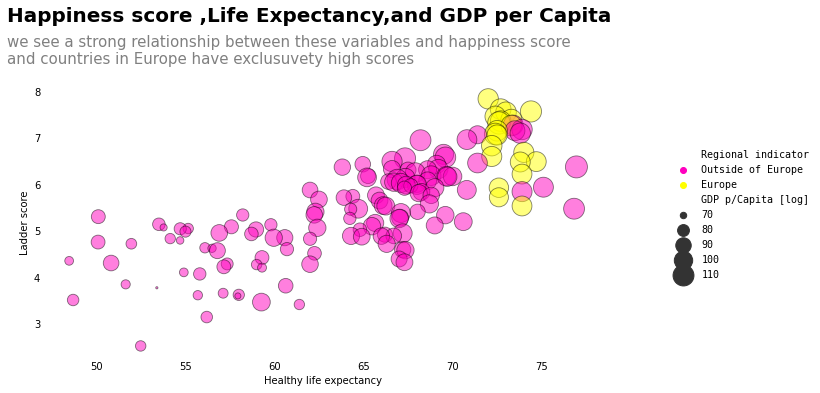

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))

cmap=["#ff00bf","#ffff00"]

sns.scatterplot(data=data1,x="Healthy life expectancy",y="Ladder score",hue=data1["Regional indicator"]=="Western Europe",palette=cmap,alpha=0.5,ec="black",legend=True,size=data1["Logged GDP per capita"]*10,sizes=(5,500))

ax.tick_params(axis="both",which="both",length=0)

for s in ["left","right","bottom","top"]:
    ax.spines[s].set_visible(False)
ax.text(45,9.5,"Happiness score ,Life Expectancy,and GDP per Capita",fontfamily="sensarif",fontsize=20,fontweight="bold")   
ax.text(45,8.6,'''we see a strong relationship between these variables and happiness score
and countries in Europe have exclusuvety high scores''',fontfamily="sensarif",fontsize=15,fontweight="light",color="gray")   

L=ax.legend(frameon=False,loc="upper center",bbox_to_anchor=(1.25,0.8),ncol=1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor("none")
L.get_texts()[1].set_text("Outside of Europe")
L.get_texts()[2].set_text("Europe")
L.get_texts()[3].set_text("GDP p/Capita [log]")

plt.show()

In [ ]:
len( data1["Regional indicator"].unique())

10

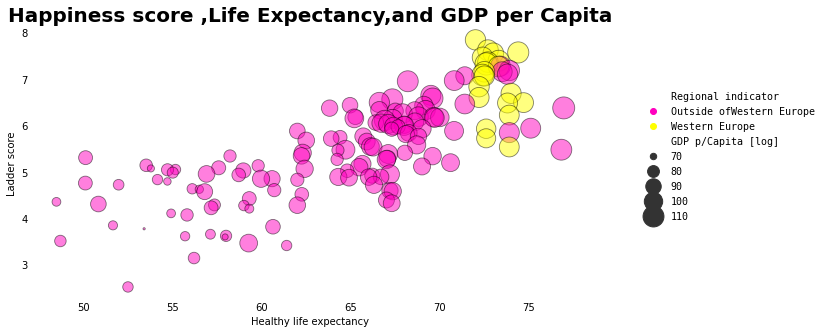

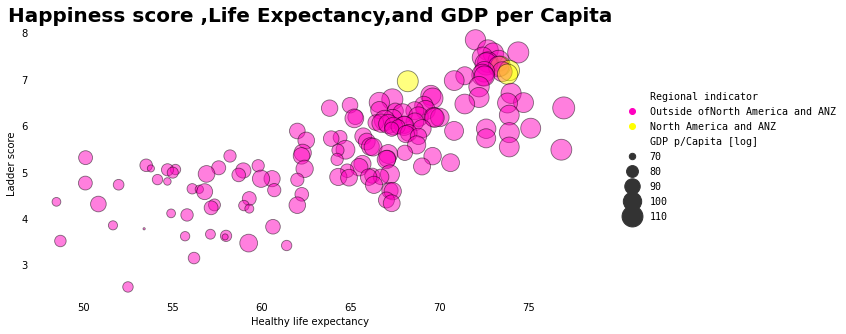

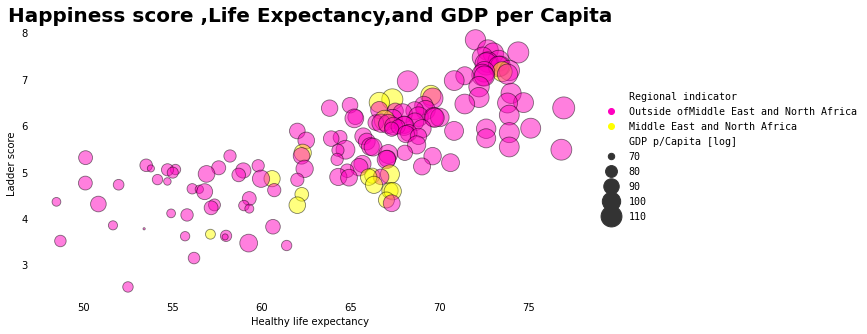

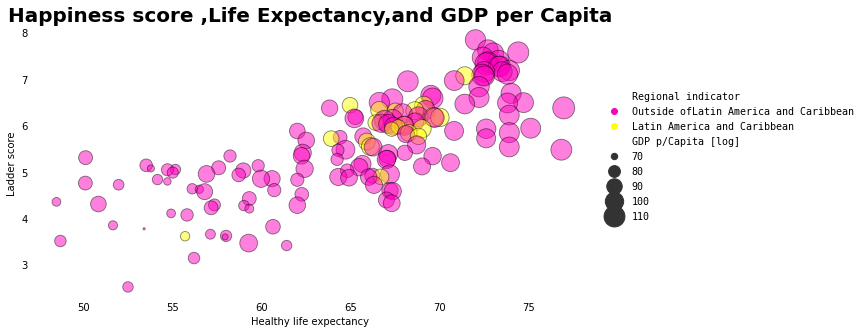

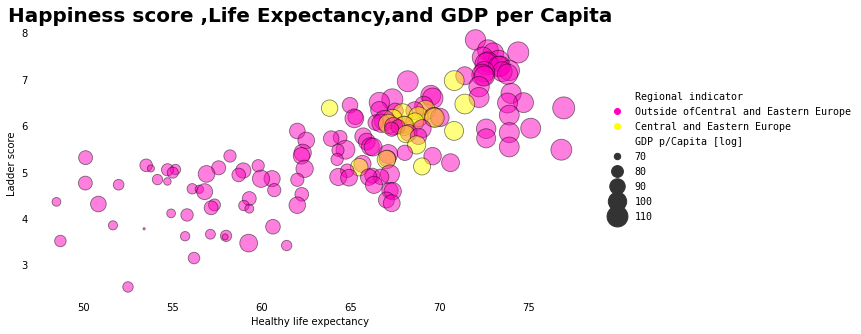

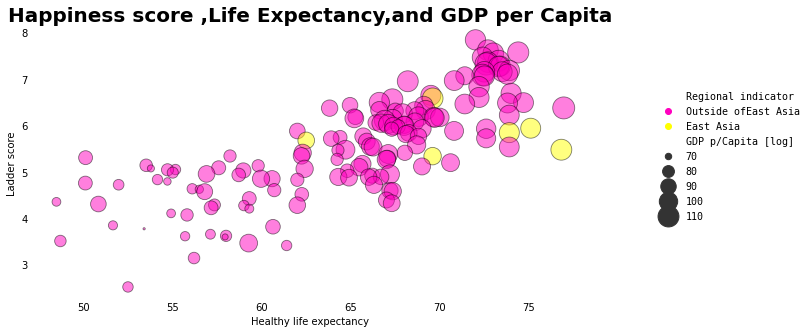

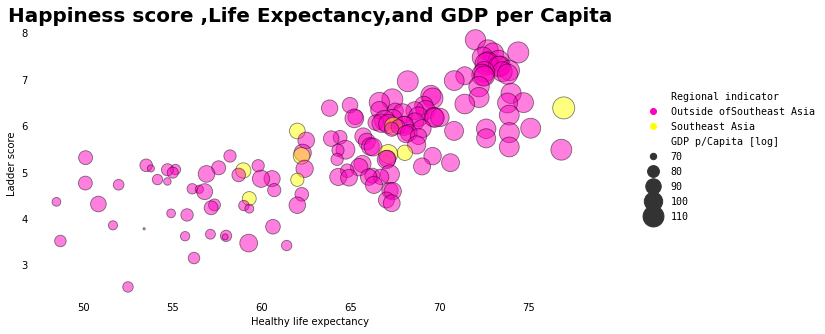

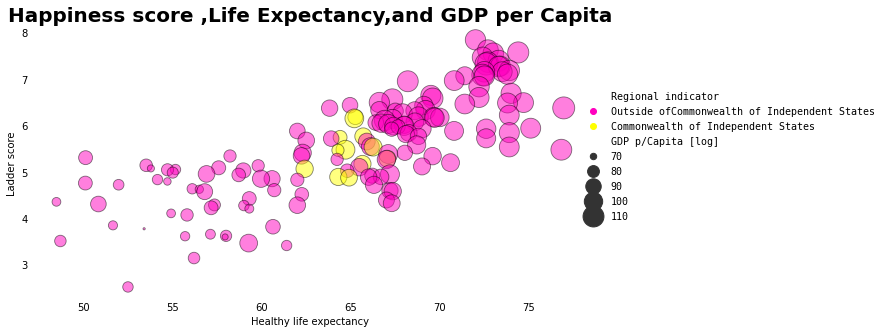

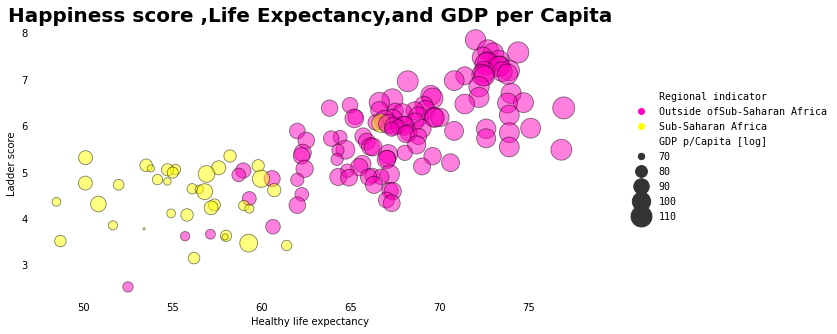

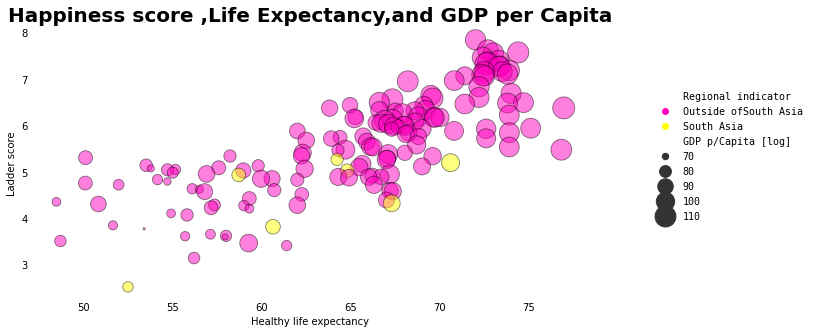

In [ ]:
cmap=["#ff00bf","#ffff00"]

for region in data1["Regional indicator"].unique():
    _,ax=plt.subplots(figsize=(10,5))
   
    sns.scatterplot(data=data1,x="Healthy life expectancy",y="Ladder score",hue=data1["Regional indicator"]==region ,palette=cmap,alpha=0.5,ec="black",legend=True,size=data1["Logged GDP per capita"]*10,sizes=(5,500))
   
    L=ax.legend(frameon=False,loc="upper center",bbox_to_anchor=(1.25,0.8),ncol=1)
    plt.setp(L.texts, family='monospace')
    L.get_frame().set_facecolor("none")
    L.get_texts()[1].set_text("Outside of"+region)
    L.get_texts()[2].set_text(region)
    L.get_texts()[3].set_text("GDP p/Capita [log]")
    ax.set_title("Happiness score ,Life Expectancy,and GDP per Capita",fontfamily="sensarif",fontsize=20,fontweight="bold")

    
    ax.tick_params(axis="both",which="both",length=0)
    
    for s in ["left","right","bottom","top"]:
        ax.spines[s].set_visible(False)


plt.show()

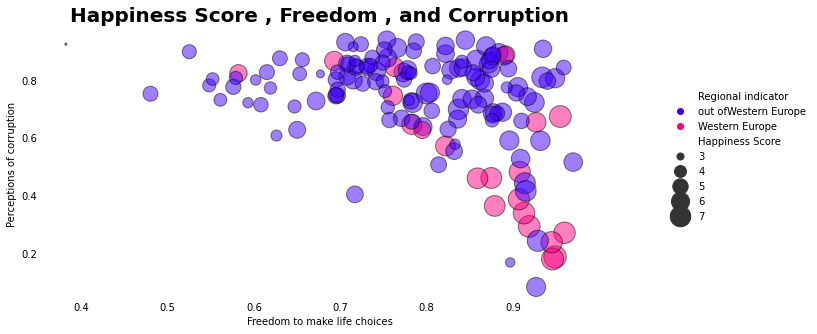

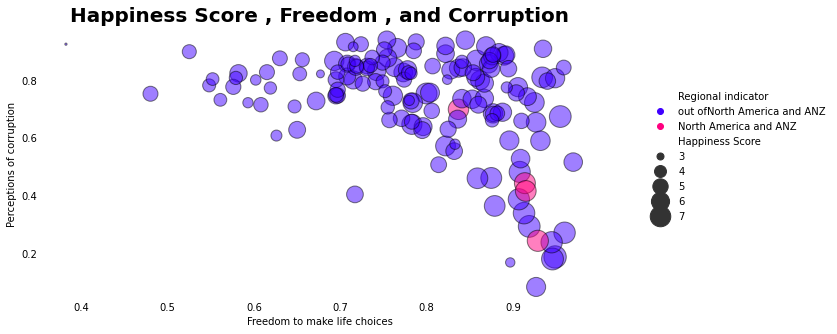

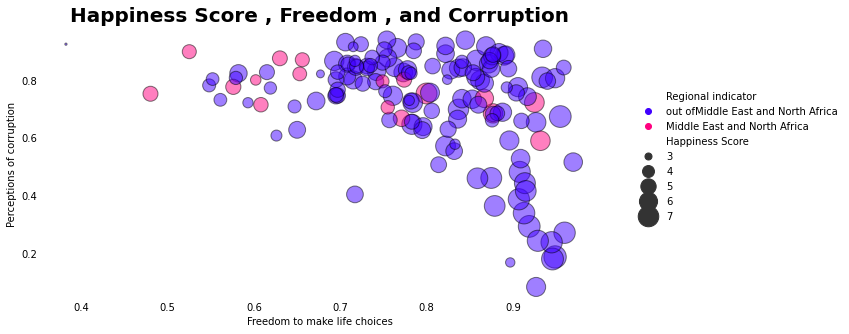

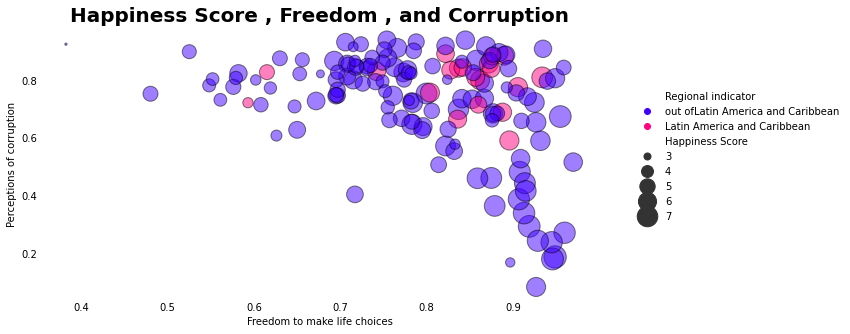

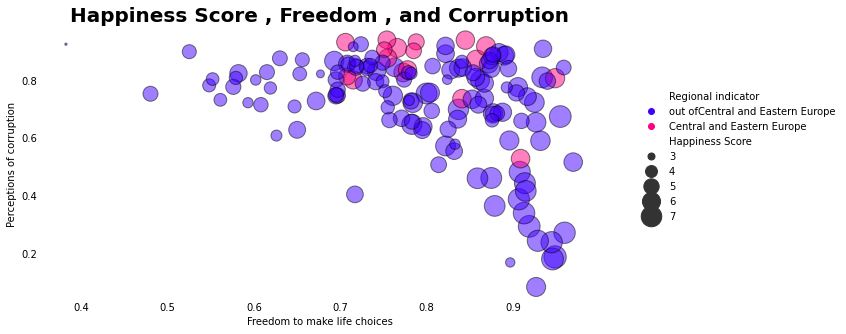

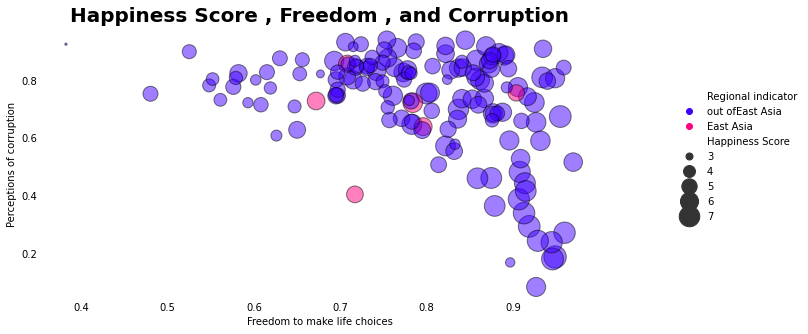

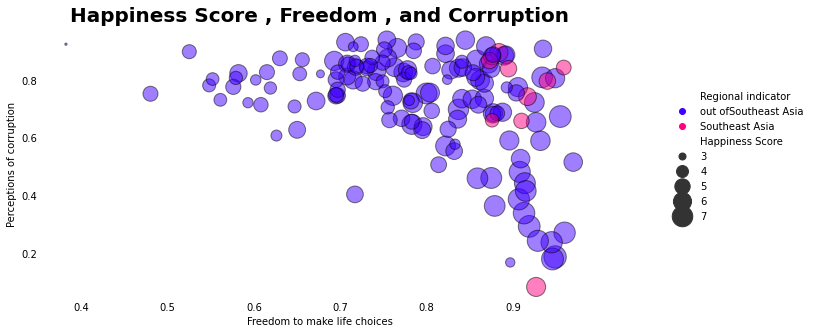

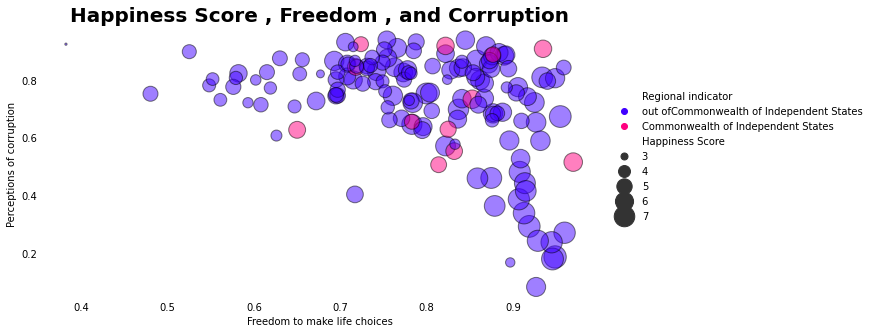

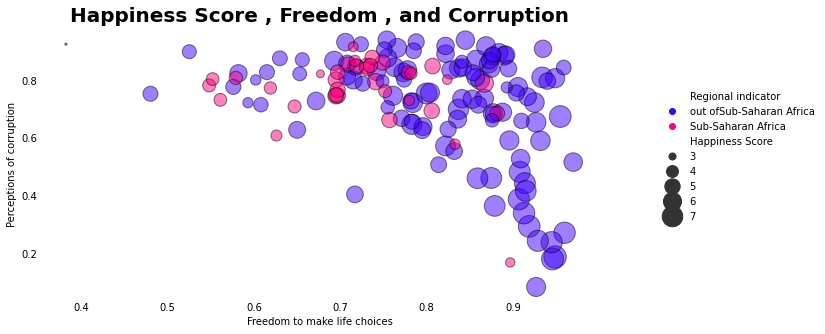

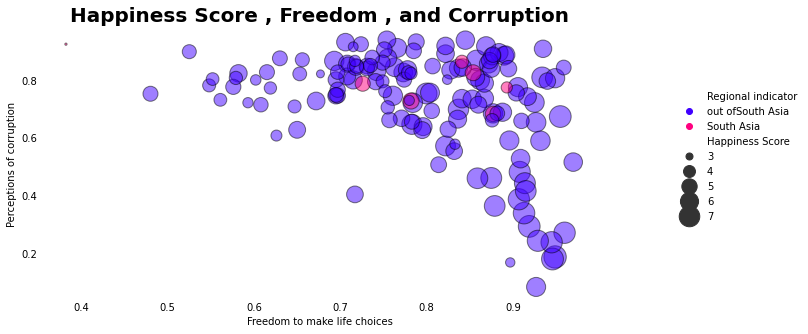

In [ ]:
for region in data1["Regional indicator"].unique():
    _,ax=plt.subplots(figsize=(10,5))
    cmap=["#4000ff","#ff0080"]
    sns.scatterplot(data=data1,x="Freedom to make life choices",y="Perceptions of corruption",hue=data1["Regional indicator"]==region,palette=cmap,ec="black",alpha=0.5,size=data1["Ladder score"],sizes=(5,500))
    L=ax.legend(frameon=False,bbox_to_anchor=(1.25,0.8),loc="upper center")
    L.get_texts()[1].set_text("out of"+region)
    L.get_texts()[2].set_text(region)
    L.get_texts()[3].set_text("Happiness Score")
    ax.tick_params(which="both",length=0,axis="both")
    
    for s in ["left","right","bottom","top"]:
        ax.spines[s].set_visible(False)
    ax.set_title("Happiness Score , Freedom , and Corruption",fontfamily="sanserif",fontweight="bold",fontsize=20)


In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  ...  Perceptions of corruption  \
0                           0.949  ...                      0.186   
1                           0.946  ...                      0.179   
2                           0.919  ...                      0.292   
3                           0.955  ...                      0.673   
4                           0.913  ...                      0.338   
..                            ...  ...                        ...   
144                         0.715  ...                      0.915   
145                         0.824  ...                      0.801   
146                         0.897  ...                      0.167   
147                         0.677  ...                      0.821   
148                         0.382  ...                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                             0.370   

     Explained by: Social support  Explained by: Healthy life e

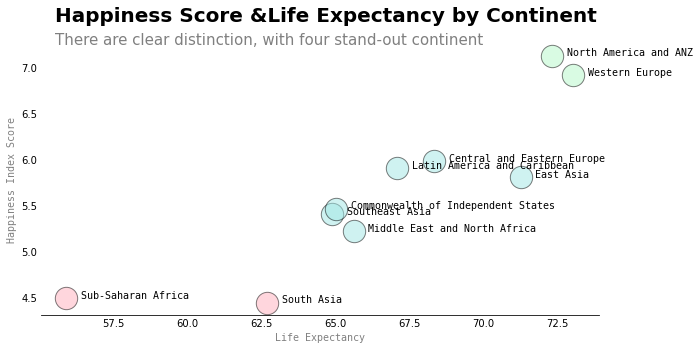

In [ ]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(10,5))


c = ['#e7e9e7' for _ in range(10)]

c[0]=c[1]="#B4F8C8"
c[2]=c[3]=c[4]=c[5]=c[6]=c[7]="#A0E7E5"
c[8]=c[9]="#FFAEBC"
i=0

for region in data1["Regional indicator"].unique():
    mean_lifeexp=data1.loc[data1["Regional indicator"]==region]["Healthy life expectancy"].mean()
    
    mean_happiness=data1.loc[data1["Regional indicator"]==region]["Ladder score"].mean()

    plt.scatter(mean_lifeexp,mean_happiness,c=c[i],edgecolors="black",s=500,alpha=0.5)
   
    plt.annotate(region,xy=(mean_lifeexp+0.5,mean_happiness),xytext=(mean_lifeexp+0.5,mean_happiness),font="monospace")
    i+=1
#     if mean_happiness>=6.3:
#         ax=plt.scatter(mean_lifeexp,mean_happiness,c=cmap[2])
#     elif (x<6.3 and x>5):
#         ax=plt.scatter(mean_lifeexp,mean_happiness,c=cmap[1])
#     else:
#         ax=plt.scatter(mean_lifeexp,mean_happiness,c=cmap[0])

ax.tick_params(which="both",axis="both",length=0)
ax.set_xlabel("Life Expectancy",font="monospace",color="gray",weight="light")
ax.set_ylabel("Happiness Index Score",font="monospace",color="gray",weight="light")
ax.text(55.5,7.5,"Happiness Score &Life Expectancy by Continent",fontweight="bold",fontsize=20,fontfamily="sensarif")
ax.text(55.5,7.25,"There are clear distinction, with four stand-out continent",fontsize=15,fontweight="light",color="gray")
for s in ["left","right","top"]:
    ax.spines[s].set_visible(False)
    

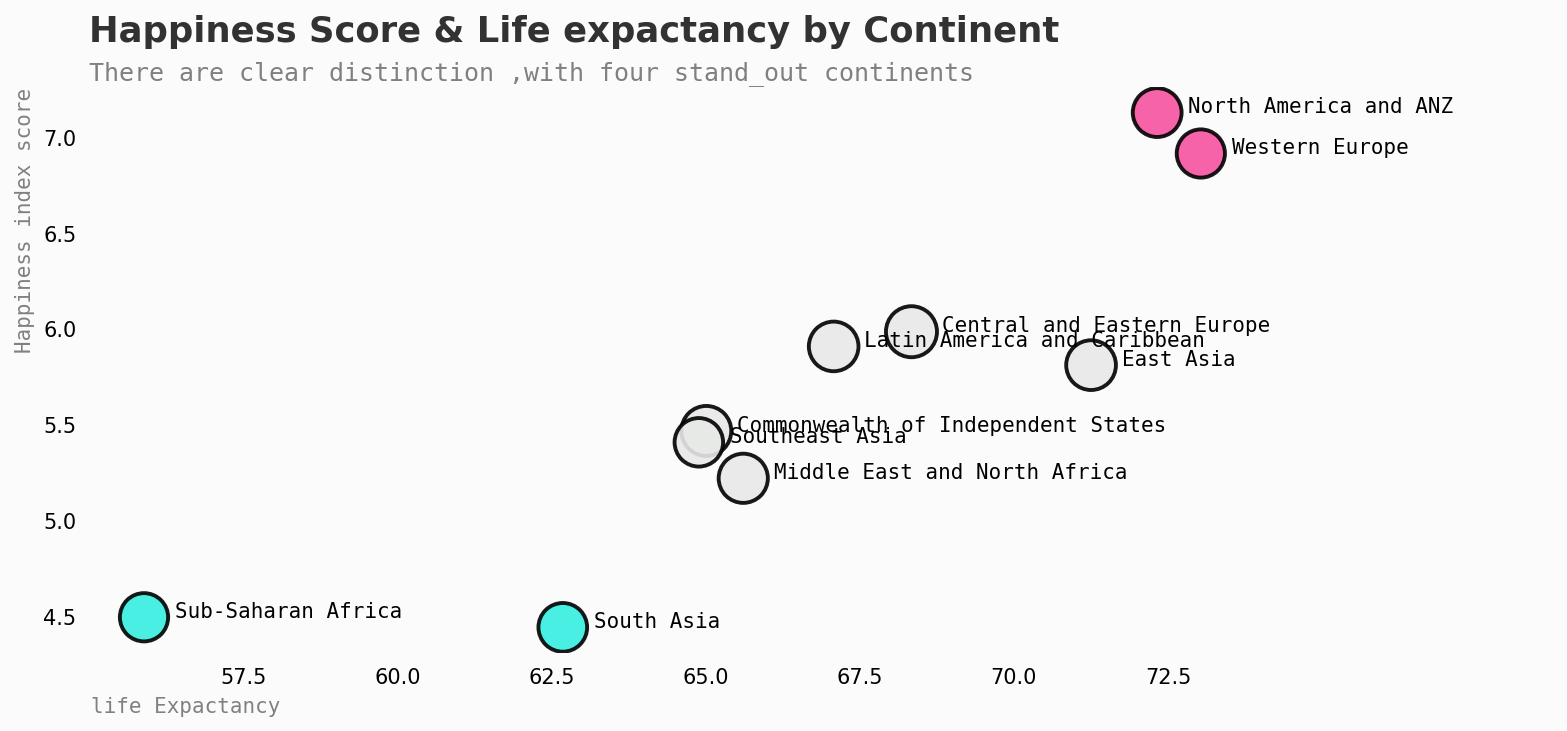

In [ ]:
continent_score=data1.groupby("Regional indicator")['Healthy life expectancy','Logged GDP per capita'
  ,'Perceptions of corruption','Freedom to make life choices','Ladder score'].mean().reset_index()
    
background="#fbfbfb"

fig,ax=plt.subplots(1,1,figsize=(10,5),dpi=150)

fig.patch.set_facecolor(background)
cmap=["#F652A0","#36EEE0"]

color_map=["#e7e9e7" for _  in range(10)]
color_map[9]="#F652A0"
color_map[5]="#F652A0"
color_map[8]="#36EEE0"
color_map[6]="#36EEE0"


ax.set_facecolor(background)

sns.scatterplot(data=continent_score,x=continent_score['Healthy life expectancy'],y=continent_score["Ladder score"],hue=continent_score["Regional indicator"],alpha=0.9,ec="black"
               ,palette=color_map,size=data1["Ladder score"],legend=False,sizes=(5,600))


ax.set_xlabel("life Expactancy",fontfamily="monospace",loc="left",color="gray")
ax.set_ylabel("Happiness index score",fontfamily="monospace",loc="top",color="gray")
ax.tick_params(axis="both",which="major",labelsize=10)

for s in ["left","right","top","bottom"]:
    ax.spines[s].set_visible(False)
    
    
ax.text(55,7.5,"Happiness Score & Life expactancy by Continent",fontfamily="sansserif",fontweight="normal",fontsize=17,
        weight="bold",color="#323232")
ax.text(55,7.3,"There are clear distinction ,with four stand_out continents",fontfamily="monospace",fontweight="light",fontsize=12,color="gray")


L=ax.legend(frameon=False,loc="upper center",bbox_to_anchor=(1.25,0.8),ncol=1)
plt.setp(L.texts,family="monospace")
L.get_frame().set_facecolor("none")


ax.tick_params(axis="both",which="both",left=False,bottom=False,labelbottom=True)

for i ,txt in enumerate(continent_score["Regional indicator"]):
    ax.annotate(txt,(continent_score['Healthy life expectancy'][i]+0.5, continent_score['Ladder score'][i]),fontfamily="monospace")

In [ ]:
import geopandas
import matplotlib.colors
import pycountry


geo_temp=data1

def alpha3code(column):
    CODE=[]
    for country in column:
        print(pycountry.countries.get(name=country).alpha_3)

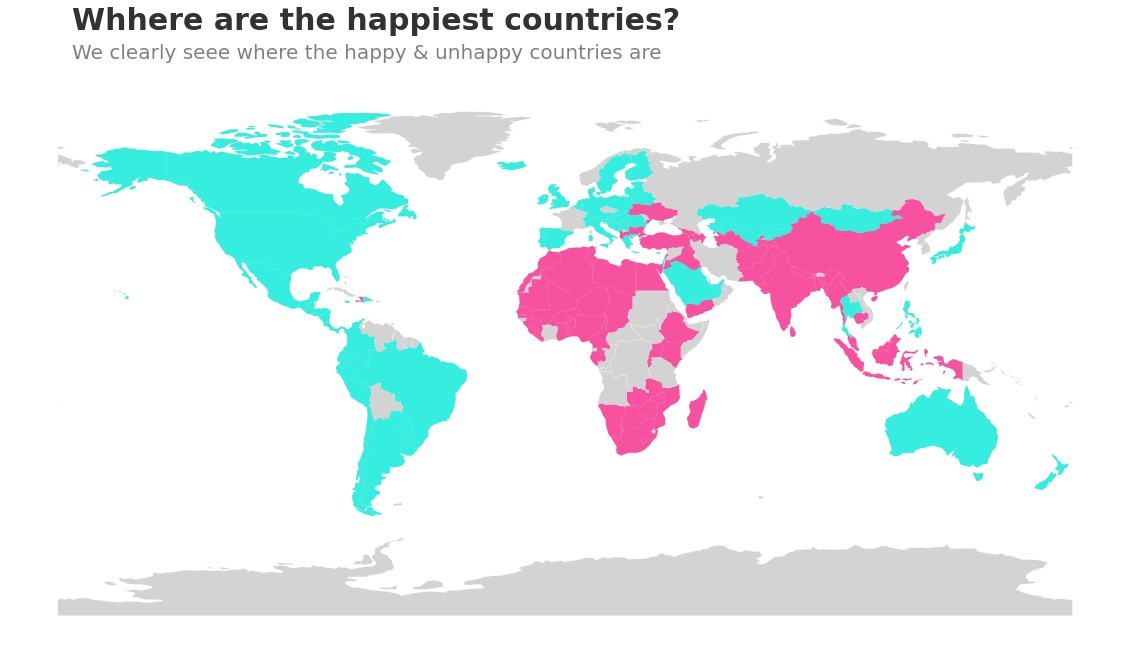

In [ ]:
import geopandas
import matplotlib.colors
import pycountry


geo_temp=data1

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
            
        except:
            CODE.append("None")
    return CODE

geo_temp["CODE"]=alpha3code(geo_temp["Country name"])

world=geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world.columns=["pop_est","continent","name","CODE","gdp_md_est","geometry"]
merge=pd.merge(world,geo_temp,on="CODE")


cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["#F652A0","#36EEE0"])

ax=world.plot(figsize=(20,15),linewidth=0.25,edgecolor=background_color,color="lightgray")
ax.axis("off")
ax.set_facecolor(background_color)
merge.plot(column="lower_happy",figsize=(20,15),legend=False,cmap=cmap,ax=ax)
            
ax.text(-175,112,"Whhere are the happiest countries?",fontsize=30,fontweight="bold",fontfamily="sansserif",color="#323232")
ax.text(-175,102,"We clearly seee where the happy & unhappy countries are",color="gray",fontfamily="monspace",fontsize=20)

plt.show()

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  ...  Ladder score in Dystopia  \
0                           0.949  ...                      2.43   
1                           0.946  ...                      2.43   
2                           0.919  ...                      2.43   
3                           0.955  ...                      2.43   
4                           0.913  ...                      2.43   
..                            ...  ...                       ...   
144                         0.715  ...                      2.43   
145                         0.824  ...                      2.43   
146                         0.897  ...                      2.43   
147                         0.677  ...                      2.43   
148                         0.382  ...                      2.43   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.446                         1.106   
1                               1.502                         1.108   
2                               1.566                         1.079   
3                               1.482                         1.172   
4                               1.501                         1.079   
..                                ...                           ...   
144                             0.451                         0.731   
145                             1.099                         0.724   
146                             0.364                         0.202   
147                             0.457                         0.649   
148                             0.370                         0.000   

     Explained by: Healthy 

In [ ]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'lower_happy', 'CODE'],
      dtype='object')

In [ ]:
unhappy=data1.groupby("Country name")["Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"].mean().sort_values("Ladder score",ascending=True)[0:10]
happy=data1.groupby("Country name")["Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"].mean().sort_values("Ladder score",ascending=False)[0:10]
happy.reset_index(inplace=True)
unhappy.reset_index(inplace=True)

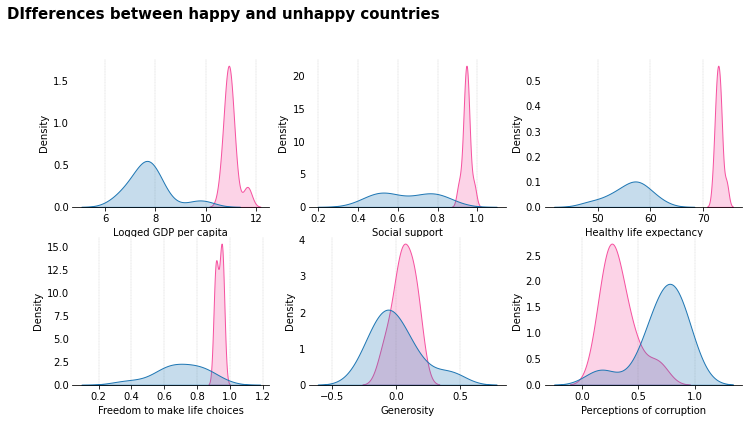

In [ ]:
# ax,fig=plt.subplots(figsize=(20,15),ncols=3,nrows=2)
plt.figure(figsize=(12,6))
i=0
for index in happy.columns[2:] :
    ax=plt.subplot(231+i)
    ax=sns.kdeplot(happy[index],shade=True,fill=True,color="#F652A0")
    ax=sns.kdeplot(unhappy[index],shade=True,fill=True)
    i+=1
    ax.grid(which="major",axis="x",zorder=0,linestyle="--",linewidth=0.3)
    ax.tick_params(axis="y",which="both",length=0,left=False)
    ax.get_yaxis().set_visible(True)
    ax.set_axisbelow(True)
    for s in ["left","right","top"]:
        ax.spines[s].set_visible(False)
    
plt.suptitle("DIfferences between happy and unhappy countries",x=0.3,y=1,fontsize=15,fontweight="bold")

plt.show()

In [ ]:
data1

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  ...  Ladder score in Dystopia  \
0                           0.949  ...                      2.43   
1                           0.946  ...                      2.43   
2                           0.919  ...                      2.43   
3                           0.955  ...                      2.43   
4                           0.913  ...                      2.43   
..                            ...  ...                       ...   
144                         0.715  ...                      2.43   
145                         0.824  ...                      2.43   
146                         0.897  ...                      2.43   
147                         0.677  ...                      2.43   
148                         0.382  ...                      2.43   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.446                         1.106   
1                               1.502                         1.108   
2                               1.566                         1.079   
3                               1.482                         1.172   
4                               1.501                         1.079   
..                                ...                           ...   
144                             0.451                         0.731   
145                             1.099                         0.724   
146                             0.364                         0.202   
147                             0.457                         0.649   
148                             0.370                         0.000   

     Explained by: Healthy 

In [ ]:
data2

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

In [ ]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
pop=pd.read_csv("../input/population-by-country-2020/population_by_country_2020.csv")


In [ ]:
pop

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1440297825        0.39 %     5540090   
1                     India         1382345085        0.99 %    13586631   
2             United States          331341050        0.59 %     1937734   
3                 Indonesia          274021604        1.07 %     2898047   
4                  Pakistan          221612785        2.00 %     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4993        0.06 %           3   
231        Falkland Islands               3497        3.05 %         103   
232                    Niue               1628        0.68 %          11   
233                 Tokelau               1360        1.27 %          17   
234                Holy See                801        0.25 %           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                153          9388211       -348399.0        1.7       38   
1                464          2973190       -532687.0        2.2       28   
2                 36          9147420        954806.0        1.8       38   
3                151          1811570        -98955.0        2.3       30   
4                287           770880       -233379.0        3.6       23   
..               ...              ...             ...        ...      ...   
230               50              100             NaN       N.A.     N.A.   
231                0            12170             NaN       N.A.     N.A.   
232                6              260             NaN       N.A.     N.A.   
233              136               10             NaN       N.A.     N.A.   
234             2003                0             NaN       N.A.     N.A.   

    Urban Pop % World Share  
0          61 %     18.47 %  
1          35 %     17.70 %  
2          83 %      4.25 %  
3          56 %      3.51 %  
4          35 %      2.83 %  
..          ...         ...  
230        10 %      0.00 %  
231        66 %      0.00 %  
232        46 %      0.00 %  
233         0 %      0.00 %  
234        N.A.      0.00 %  

[235 rows x 11 columns]

In [ ]:
pop.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [ ]:
pop.columns=['Country name', 'Population', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']

In [ ]:
pop.head(5)

Country name  Population Yearly Change  Net Change  Density (P/Km²)  \
0          China  1440297825        0.39 %     5540090              153   
1          India  1382345085        0.99 %    13586631              464   
2  United States   331341050        0.59 %     1937734               36   
3      Indonesia   274021604        1.07 %     2898047              151   
4       Pakistan   221612785        2.00 %     4327022              287   

   Land Area (Km²)  Migrants (net) Fert. Rate Med. Age Urban Pop % World Share  
0          9388211       -348399.0        1.7       38        61 %     18.47 %  
1          2973190       -532687.0        2.2       28        35 %     17.70 %  
2          9147420        954806.0        1.8       38        83 %      4.25 %  
3          1811570        -98955.0        2.3       30        56 %      3.51 %  
4           770880       -233379.0        3.6       23        35 %      2.83 %

In [ ]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     235 non-null    object 
 1   Population       235 non-null    int64  
 2   Yearly Change    235 non-null    object 
 3   Net Change       235 non-null    int64  
 4   Density (P/Km²)  235 non-null    int64  
 5   Land Area (Km²)  235 non-null    int64  
 6   Migrants (net)   201 non-null    float64
 7   Fert. Rate       235 non-null    object 
 8   Med. Age         235 non-null    object 
 9   Urban Pop %      235 non-null    object 
 10  World Share      235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [ ]:
pop.describe().T.style.bar(subset=["mean"],color="pink").background_gradient(subset=["max"],cmap="Reds").background_gradient(subset=["min"],cmap="summer")

In [ ]:
df= pd.merge(data1, pop, on='Country name')

df=df[df["Urban Pop %"]!="N.A."]


df["Urban Pop %"]=df["Urban Pop %"].str.rstrip("%").astype(float)/100
df["World Share"]=df["World Share"].str.rstrip("%").astype(float)/100
df["Yearly Change"]=df["Yearly Change"].str.rstrip("%").astype(float)/100
df["Fert. Rate"]=df["Fert. Rate"].astype(float)
df["Med. Age"]=df["Med. Age"].astype(float)

df["Count"]=1
df["pop_quantile"]=pd.qcut(df["Population"],10,labels=False)
df["density_quantile"]=pd.qcut(df["Density (P/Km²)"],10,labels=False)

In [ ]:
df.head(5)

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  ...  Density (P/Km²)  Land Area (Km²)  \
0                         0.949  ...               18           303890   
1                         0.946  ...              137            42430   
2                         0.919  ...              219            39516   
3                         0.955  ...                3           100250   
4                         0.913  ...              508            33720   

   Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  World Share  Count  \
0         14000.0         1.5      43.0         0.86       0.0007      1   
1         15200.0         1.8      42.0         0.88       0.0007      1   
2         52000.0         1.5      43.0         0.74       0.0011      1   
3           380.0         1.8      37.0         0.94       0.0000      1   
4         16000.0         1.7      43.0         0.92       0.0022      1   

   pop_quantile  density_quantile  
0             2                 1  
1             2                 7  
2             3                 7  
3             0                 0  
4             5                 9  

[5 rows x 35 columns]

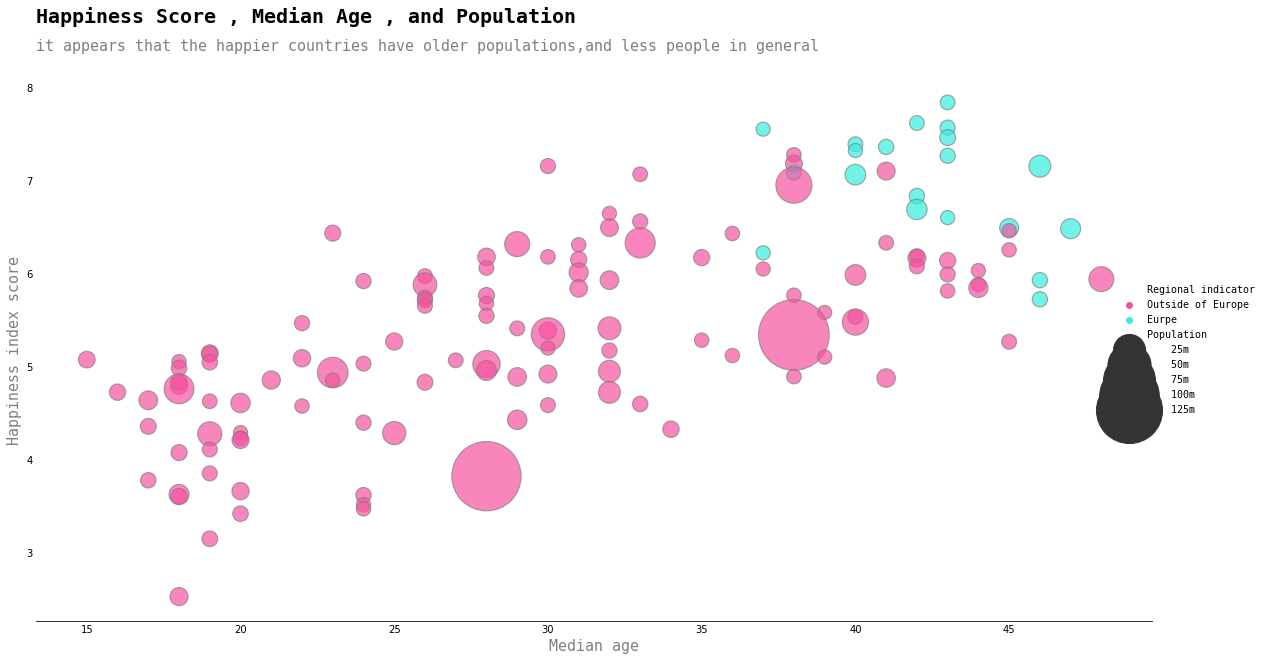

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,10))

cmap=["#F652A0","#36EEE0"]

  
sns.scatterplot(data=df,x="Med. Age",y="Ladder score",legend=True,hue=df["Regional indicator"]=="Western Europe",palette=cmap,size=df["Population"]*100,ec="gray",sizes=(200,5000),alpha=0.7)


ax.set_xlabel("Median age",fontsize=15,fontfamily="monospace",fontweight="light",color="gray")
ax.set_ylabel("Happiness index score",fontsize=15,fontfamily="monospace",fontweight="light",color="gray")

start,end=ax.get_xlim()

ax.text(start,8.7,"Happiness Score , Median Age , and Population",fontfamily="monospace",fontsize=20,fontweight="bold")
ax.text(start,8.4,"it appears that the happier countries have older populations,and less people in general",fontsize=15,fontweight="light",fontfamily="monospace",color="gray")

ax.tick_params(axis="both",which="both",length=0)


for s in ["left","right","top"]:
    ax.spines[s].set_visible(False)


    
L=ax.legend(frameon=False,loc="center right",bbox_to_anchor=(1.1,0.5),ncol=1)
plt.setp(L.texts,family="monospace")
L.get_texts()[1].set_text("Outside of Europe")
L.get_texts()[2].set_text("Eurpe")
L.get_texts()[4].set_text("    25m")
L.get_texts()[5].set_text("    50m")
L.get_texts()[6].set_text("    75m")
L.get_texts()[7].set_text("    100m")
L.get_texts()[8].set_text("    125m")